# Question 1
## Exploratory data analysis - Use the appropriate statistics and plots to investigate the following: 

1- Install requirements:
```
pip install -r requirements.txt
```
Imports:

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from pprint import   pprint
import textwrap

Throughout the questions, we will follow the following steps to solve the questions:
1. Import the data (only using the required columns).
2. Printing information about the data to confirm a successful import.
3. Perform basic data cleaning.
4. Display information about the data again to ensure cleaning was successful.
5. Start exploring the data using plots
6. Further explore some data using statistical methods (optional)
7. Describe out conclusion.

We will start with question 5 as it shows all those steps in action, however, the steps wont be explicitly labeled for the rest of the questions.

### 5. The relationship between age, pre-existing medical conditions and/or risk behaviors, and rate of admittance to the ICU.

1. Import the data

In [4]:
df = pd.read_csv("/Users/mohamedghaith/Documents/Uni/Stat/Project/data.csv",
                 usecols=["age_group", "underlying_conditions_yn", "icu_yn"],
                 dtype={"age_group": "category", "underlying_conditions_yn": "category",
                        "icu_yn": "category"})

2. Print data information

In [5]:
df.info()
print("Categories for 'age_group':", df["age_group"].cat.categories)
print("Categories for 'underlying_conditions_yn':",
      df["underlying_conditions_yn"].cat.categories)
print("Categories for 'icu_yn':", df["icu_yn"].cat.categories)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19020962 entries, 0 to 19020961
Data columns (total 3 columns):
 #   Column                    Dtype   
---  ------                    -----   
 0   age_group                 category
 1   icu_yn                    category
 2   underlying_conditions_yn  category
dtypes: category(3)
memory usage: 54.4 MB
Categories for 'age_group': Index(['0 - 17 years', '18 to 49 years', '50 to 64 years', '65+ years',
       'Missing'],
      dtype='object')
Categories for 'underlying_conditions_yn': Index(['No', 'Yes'], dtype='object')
Categories for 'icu_yn': Index(['Missing', 'No', 'Unknown', 'Yes'], dtype='object')


3. Clean up data

In [6]:
df = df[(df["age_group"] != "Unknown") & (
    df["age_group"] != "Missing") & (df["age_group"] != "NA")]
df = df[(df["icu_yn"] != "Missing") & (df["icu_yn"] != "Unknown")]
df = df[(df["underlying_conditions_yn"] != "Missing") & 
        (df["underlying_conditions_yn"] != "Unknown")]
df["underlying_conditions_yn"] = df["underlying_conditions_yn"].fillna("No")

df["age_group"] = df["age_group"].cat.remove_unused_categories()
df["icu_yn"] = df["icu_yn"].cat.remove_unused_categories()
df["underlying_conditions_yn"] = df["underlying_conditions_yn"].cat.remove_unused_categories()
df.reset_index(drop=True, inplace=True)

4. Print data information again.

In [7]:
display(df.head())
display(df.info())
print("Categories for 'age_group':", df["age_group"].cat.categories)
print("Categories for 'underlying_conditions_yn':",
      df["underlying_conditions_yn"].cat.categories)
print("Categories for 'icu_yn':", df["icu_yn"].cat.categories)

age_group icu_yn underlying_conditions_yn
0  50 to 64 years     No                       No
1  18 to 49 years     No                       No
2  50 to 64 years     No                       No
3  50 to 64 years     No                      Yes
4  50 to 64 years     No                      Yes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606716 entries, 0 to 606715
Data columns (total 3 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   age_group                 596664 non-null  category
 1   icu_yn                    606716 non-null  category
 2   underlying_conditions_yn  606716 non-null  category
dtypes: category(3)
memory usage: 1.7 MB


None

Categories for 'age_group': Index(['0 - 17 years', '18 to 49 years', '50 to 64 years', '65+ years'], dtype='object')
Categories for 'underlying_conditions_yn': Index(['No', 'Yes'], dtype='object')
Categories for 'icu_yn': Index(['No', 'Yes'], dtype='object')


5. Start using plots to explore data.

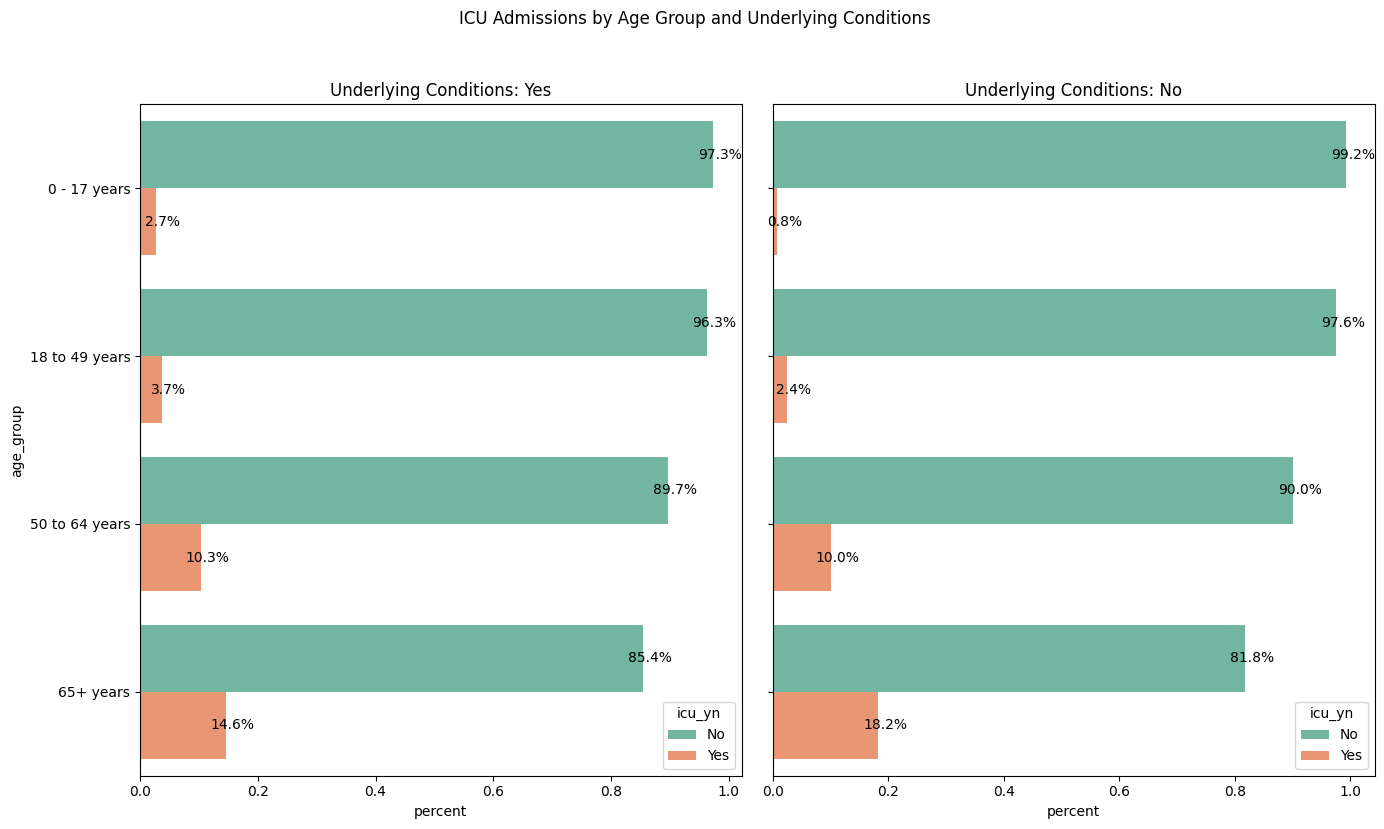

In [8]:
# Calculate the percentage for each combination of age group, underlying conditions, and ICU admission
df_grouped = df.groupby(['age_group', 'underlying_conditions_yn', 'icu_yn']).size().reset_index(name='count')
df_total = df_grouped.groupby(['age_group', 'underlying_conditions_yn'])['count'].transform('sum')
df_grouped['percent'] = df_grouped['count'] / df_total

# Create the subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 8), sharey=True)
fig.suptitle('ICU Admissions by Age Group and Underlying Conditions', y=1.03)

# Plot for underlying conditions = Yes
plot_yes = sns.barplot(
    data=df_grouped[df_grouped['underlying_conditions_yn'] == 'Yes'],
    y='age_group',
    x='percent',
    hue='icu_yn',
    dodge=True,
    palette='Set2',
    ax=axes[0]
)
axes[0].set_title('Underlying Conditions: Yes')

# Annotate the plot with percentages
for p in plot_yes.patches:
    percentage = '{:.1f}%'.format(p.get_width() * 100)
    if percentage == '0.0%':
        continue
    plot_yes.annotate(percentage,
                      (p.get_width(), p.get_y() + p.get_height() / 2.),
                      ha='center',
                      va='center',
                      xytext=(5, 0),
                      textcoords='offset points')

# Plot for underlying conditions = No
plot_no = sns.barplot(
    data=df_grouped[df_grouped['underlying_conditions_yn'] == 'No'],
    y='age_group',
    x='percent',
    hue='icu_yn',
    dodge=True,
    palette='Set2',
    ax=axes[1]
)
axes[1].set_title('Underlying Conditions: No')

# Annotate the plot with percentages
for p in plot_no.patches:
    percentage = '{:.1f}%'.format(p.get_width() * 100)
    if percentage == '0.0%':
        continue
    plot_no.annotate(percentage,
                     (p.get_width(), p.get_y() + p.get_height() / 2.),
                     ha='center',
                     va='center',
                     xytext=(5, 0),
                     textcoords='offset points')

plt.tight_layout()
plt.show()


6. Further explore the data

In [ ]:
# Create the contingency table
contingency_table = pd.crosstab(
    index=[df['age_group'], df['underlying_conditions_yn']], columns=df['icu_yn'])

# Display the contingency table
print("Contingency Table:")
print(contingency_table)

# Perform the chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results
print(f"\nChi-square statistic: {chi2}")
print(f"p-value: {p}")
print(f"Degrees of freedom: {dof}")
print("\nExpected frequencies:")
print(expected)

# Interpret the results
alpha = 0.05
if p < alpha:
    print("\nReject the null hypothesis: There is a significant association between ICU admission and the presence of \
          underlying conditions in different age groups.")
else:
    print("\nFail to reject the null hypothesis: There is no significant association between ICU admission and the presence \
          of underlying conditions in different age groups.")

Contingency Table:
icu_yn                                       No    Yes
age_group      underlying_conditions_yn               
0 - 17 years   No                         85618    670
               Yes                         7091    195
18 to 49 years No                        193049   4827
               Yes                        63179   2437
50 to 64 years No                         63081   6996
               Yes                        38987   4485
65+ years      No                         55042  12269
               Yes                        50161   8577

Chi-square statistic: 33628.01056573591
p-value: 0.0
Degrees of freedom: 7

Expected frequencies:
[[ 80437.35821836   5850.64178164]
 [  6791.98256975    494.01743025]
 [184459.28396551  13416.71603449]
 [ 61166.99537428   4449.00462572]
 [ 65325.52326938   4751.47673062]
 [ 40524.43951034   2947.56048966]
 [ 62747.06817908   4563.93182092]
 [ 54755.34891329   3982.65108671]]

Reject the null hypothesis: There is a significant

7. Our conclusion:
There is a relation seen between patients having underlying conditions and their chance of admittance to the ICU. Using the plots we can assume that underlying conditions play a factor in a patient going to the icu. 

### 1. The total number of hospitalizations versus deaths from COVID-19 over the entire US per month-year timestamp.

In [ ]:
covid_data = pd.read_csv('../Datasets/DS-1/data.csv', usecols=['case_month', 'hosp_yn', 'death_yn']
                         , dtype={'hosp_yn': 'category', 'death_yn': 'category', 'case_month': 'category'})

In [ ]:
display(covid_data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19020962 entries, 0 to 19020961
Data columns (total 3 columns):
 #   Column      Dtype   
---  ------      -----   
 0   case_month  category
 1   hosp_yn     category
 2   death_yn    category
dtypes: category(3)
memory usage: 54.4 MB


None

In [ ]:

covid_data = covid_data[(covid_data["case_month"]!="Missing") & (covid_data["case_month"]!="Unknown")]
covid_data = covid_data[(covid_data['hosp_yn'] != 'Missing') & (covid_data['hosp_yn'] != 'Unknown')]
covid_data = covid_data[(covid_data['death_yn'] != 'Missing') &( covid_data['death_yn'] != 'Unknown')]
covid_data['case_month'] = covid_data['case_month'].cat.remove_unused_categories()
covid_data['hosp_yn'] = covid_data['hosp_yn'].cat.remove_unused_categories()
covid_data['death_yn'] = covid_data['death_yn'].cat.remove_unused_categories()

covid_data.reset_index(drop=True, inplace=True)
display(covid_data.info())
print("Categories for 'hosp_yn':", covid_data['hosp_yn'].cat.categories)
print("Categories for 'death_yn':", covid_data['death_yn'].cat.categories)  
print("Categories for 'case_month':", covid_data['case_month'].cat.categories)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4038132 entries, 0 to 4038131
Data columns (total 3 columns):
 #   Column      Dtype   
---  ------      -----   
 0   case_month  category
 1   hosp_yn     category
 2   death_yn    category
dtypes: category(3)
memory usage: 11.6 MB


None

Categories for 'hosp_yn': Index(['No', 'Yes'], dtype='object')
Categories for 'death_yn': Index(['No', 'Yes'], dtype='object')
Categories for 'case_month': Index(['2020-01', '2020-03', '2020-04', '2020-05', '2020-06', '2020-07',
       '2020-08', '2020-09', '2020-10', '2020-11', '2020-12', '2021-01',
       '2021-02', '2021-03', '2021-04', '2021-05', '2021-06', '2021-07',
       '2021-08', '2021-09', '2021-10', '2021-11', '2021-12', '2022-01',
       '2022-02', '2022-03', '2022-04', '2022-05', '2022-06', '2022-07',
       '2022-08', '2022-09', '2022-10', '2022-11', '2022-12', '2023-01',
       '2023-02', '2023-03', '2023-04', '2023-05', '2023-06', '2023-07',
       '2023-08', '2023-09', '2023-10', '2023-11', '2023-12', '2024-01',
       '2024-02', '2024-03', '2020-02'],
      dtype='object')


In [ ]:
# Convert 'case_month' from categorical to datetime
covid_data['case_month'] = covid_data['case_month'].astype(str)
unique_case_months = covid_data['case_month'].unique()
covid_data['case_month'] = covid_data['case_month'].str.replace('-01$', '', regex=True)
covid_data['case_month'] = pd.to_datetime(
    covid_data['case_month'], format='%Y-%m', errors='coerce')


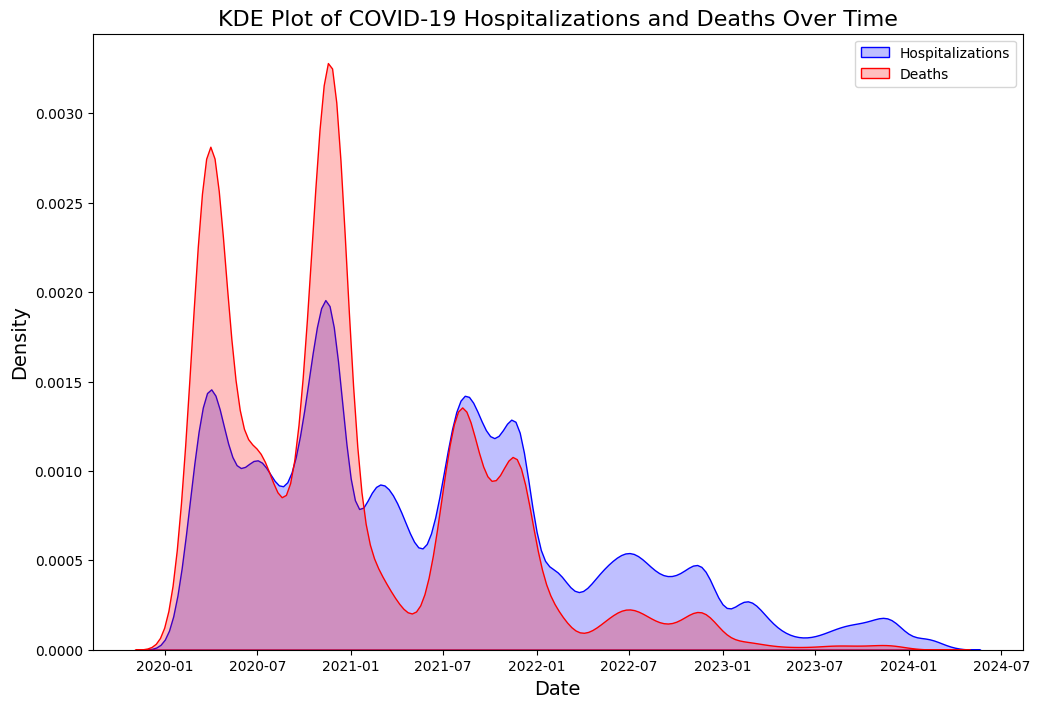

In [ ]:
hospitalizations = covid_data[covid_data['hosp_yn'] == 'Yes']
deaths = covid_data[covid_data['death_yn'] == 'Yes']
fig, ax = plt.subplots(figsize=(12, 8))
sns.kdeplot(hospitalizations['case_month'], label='Hospitalizations', ax=ax, color='blue', fill=True)
sns.kdeplot(deaths['case_month'], label='Deaths', ax=ax, color='red', fill=True)
ax.set_title('KDE Plot of COVID-19 Hospitalizations and Deaths Over Time', fontsize=16)
ax.set_xlabel('Date', fontsize=14)
ax.set_ylabel('Density', fontsize=14)
ax.legend()
plt.show()

Conclusion: We can see a peek in deaths and hospitalizations at the time COVID was starting however as vaccines and ways to deal with it came out the deaths have slowed down (shrinked vertically) compared to hospitalizations.

### 2 The relationship between age, pre-existing medical conditions and/or risk behaviors, and rate of admittance to the ICU.

In [ ]:
df = pd.read_csv("../Datasets/DS-1/data.csv",
                 usecols=["age_group", "death_yn",
                          "sex", "race", "case_month"],
                 dtype={"age_group": "category", "death_yn": "category",
                        "sex": "category", "race": "category", "case_month": "category"})

In [ ]:
print("Categories for 'sex':", df["sex"].cat.categories)
print("Categories for 'race':", df["race"].cat.categories)
print("Categories for 'age_group':", df["age_group"].cat.categories)
print("Categories for 'death_yn':", df["death_yn"].cat.categories)
print("Categories for 'case_month':", df["case_month"].cat.categories)

Categories for 'sex': Index(['Female', 'Male', 'Missing', 'Unknown', 'Other'], dtype='object')
Categories for 'race': Index(['American Indian/Alaska Native', 'Asian', 'Black', 'Missing',
       'Multiple/Other', 'Native Hawaiian/Other Pacific Islander', 'Unknown',
       'White'],
      dtype='object')
Categories for 'age_group': Index(['0 - 17 years', '18 to 49 years', '50 to 64 years', '65+ years',
       'Missing'],
      dtype='object')
Categories for 'death_yn': Index(['Missing', 'No', 'Unknown', 'Yes'], dtype='object')
Categories for 'case_month': Index(['2020-01', '2020-03', '2020-04', '2020-05', '2020-06', '2020-07',
       '2020-08', '2020-09', '2020-10', '2020-11', '2020-12', '2021-01',
       '2021-02', '2021-03', '2021-04', '2021-05', '2021-06', '2021-07',
       '2021-08', '2021-09', '2021-10', '2021-11', '2021-12', '2022-01',
       '2022-02', '2022-03', '2022-04', '2022-05', '2022-06', '2022-07',
       '2022-08', '2022-09', '2022-10', '2022-11', '2022-12', '2023-01',
  

In [ ]:
df = df[(df["death_yn"] != "Unknown") & (df["death_yn"] != "Missing")]
df = df[(df["sex"] != "Unknown") & (
    df["sex"] != "Missing") & (df["sex"] != "Other")]
df = df[(df["race"] != "Unknown") & (df["race"] != "Missing")]
df = df[(df["age_group"] != "Unknown") & (df["age_group"] != "Missing")]
df = df[(df["case_month"] != "Unknown") & (df["case_month"] != "Missing")]
df["sex"] = df["sex"].cat.remove_unused_categories()
df["race"] = df["race"].cat.remove_unused_categories()
df["age_group"] = df["age_group"].cat.remove_unused_categories()
df["death_yn"] = df["death_yn"].cat.remove_unused_categories()
df["case_month"] = df["case_month"].cat.remove_unused_categories()
df.reset_index(drop=True, inplace=True)

In [ ]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5525167 entries, 0 to 5525166
Data columns (total 5 columns):
 #   Column      Dtype   
---  ------      -----   
 0   case_month  category
 1   age_group   category
 2   sex         category
 3   race        category
 4   death_yn    category
dtypes: category(5)
memory usage: 26.3 MB


None

/tmp/ipykernel_9744/2523656279.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grouped_age = df.groupby(['age_group', 'death_yn']).size().reset_index(name='count')
/tmp/ipykernel_9744/2523656279.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_total_age = df_grouped_age.groupby('age_group')['count'].transform('sum')
/tmp/ipykernel_9744/2523656279.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grouped

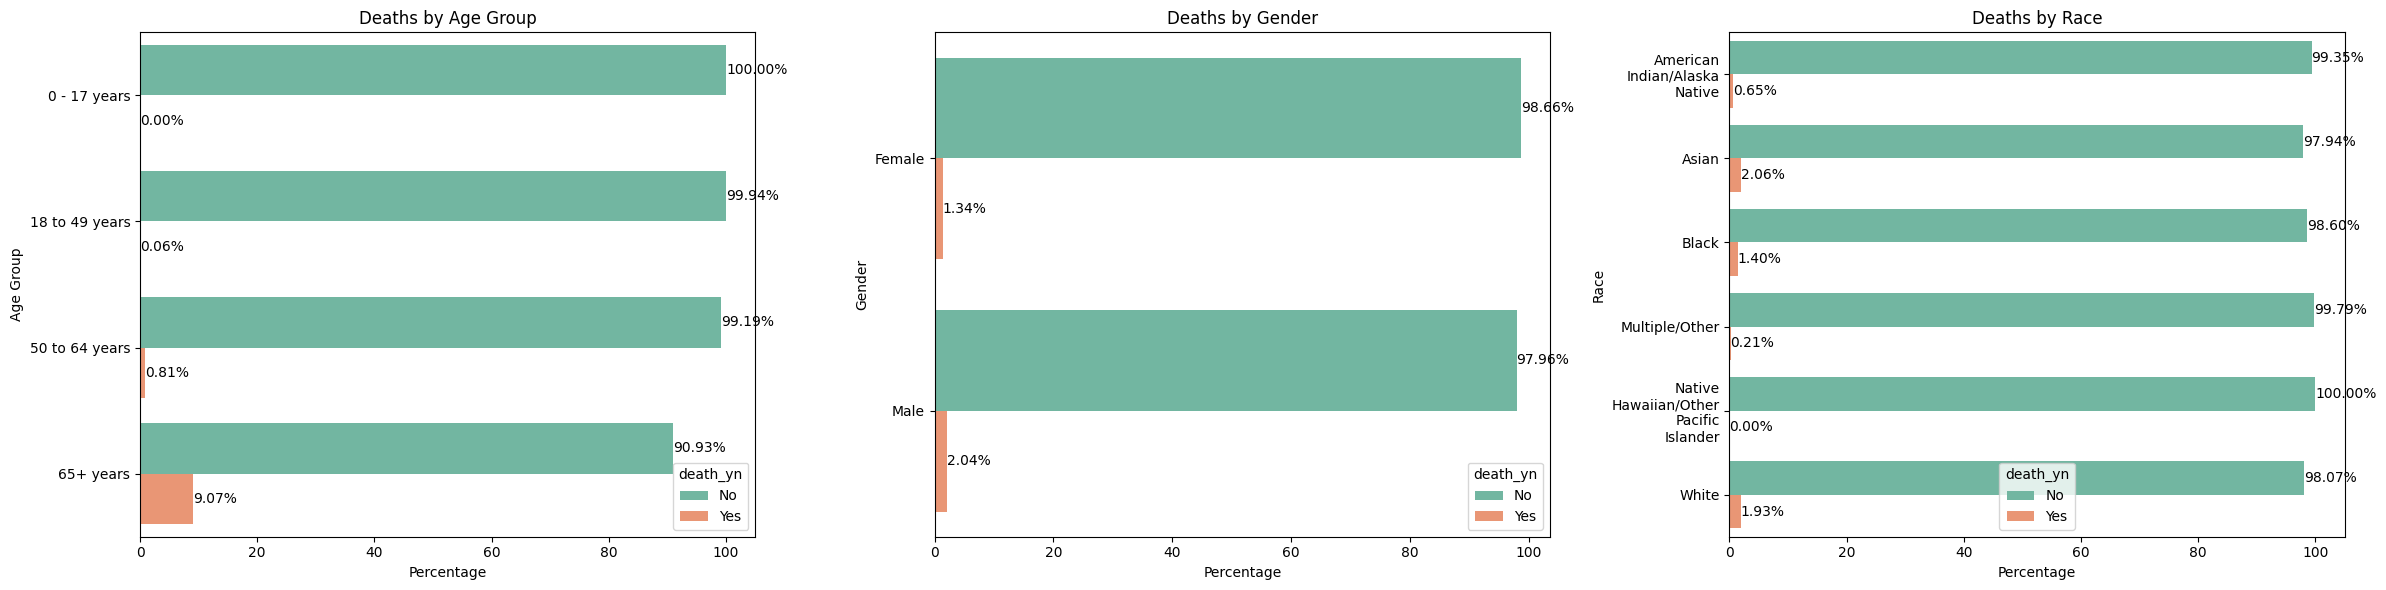

In [ ]:
# Calculate the percentage for each combination
df_grouped_age = df.groupby(['age_group', 'death_yn']).size().reset_index(name='count')
df_total_age = df_grouped_age.groupby('age_group')['count'].transform('sum')
df_grouped_age['percent'] = df_grouped_age['count'] / df_total_age * 100

df_grouped_sex = df.groupby(['sex', 'death_yn']).size().reset_index(name='count')
df_total_sex = df_grouped_sex.groupby('sex')['count'].transform('sum')
df_grouped_sex['percent'] = df_grouped_sex['count'] / df_total_sex * 100

df_grouped_race = df.groupby(['race', 'death_yn']).size().reset_index(name='count')
df_total_race = df_grouped_race.groupby('race')['count'].transform('sum')
df_grouped_race['percent'] = df_grouped_race['count'] / df_total_race * 100

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(24, 6))

# Plot 1: Deaths by Age Group
age_group_plot = sns.barplot(data=df_grouped_age, y="age_group", x="percent", hue="death_yn", dodge=True,
                             palette="Set2", ax=axes[0])
axes[0].set_title('Deaths by Age Group')
axes[0].set_xlabel('Percentage')
axes[0].set_ylabel('Age Group')
for container in age_group_plot.containers:
    labels = [f'{(v):.2f}%' for v in container.datavalues]
    age_group_plot.bar_label(container, labels=labels, label_type='edge')

# Plot 2: Deaths by Gender
gender_plot = sns.barplot(data=df_grouped_sex, y="sex", x="percent", hue="death_yn", dodge=True,
                          palette="Set2", ax=axes[1])
axes[1].set_title('Deaths by Gender')
axes[1].set_xlabel('Percentage')
axes[1].set_ylabel('Gender')
for container in gender_plot.containers:
    labels = [f'{(v):.2f}%' for v in container.datavalues]
    gender_plot.bar_label(container, labels=labels, label_type='edge')

# Plot 3: Deaths by Race
race_plot = sns.barplot(data=df_grouped_race, y="race", x="percent", hue="death_yn", dodge=True,
                        palette="Set2", ax=axes[2])
axes[2].set_title('Deaths by Race')
axes[2].set_xlabel('Percentage')
axes[2].set_ylabel('Race')
labels = [textwrap.fill(label.get_text(), 15) for label in race_plot.get_yticklabels()]
race_plot.set_yticklabels(labels)
for container in race_plot.containers:
    labels = [f'{(v):.2f}%' for v in container.datavalues]
    race_plot.bar_label(container, labels=labels, label_type='edge')

plt.tight_layout()
plt.show()


Conclusion: We an see that certain demographics are more at risk of death due to covid, for example people of ages 65 and older

### 3. The rates of COVID-related hospitalization and death with age (across age groups).

In [ ]:
df = pd.read_csv("../Datasets/DS-1/data.csv",
                 usecols=["hosp_yn", "death_yn", "age_group", "case_month"],
                 dtype={"age_group": "category", "hosp_yn": "category", "death_yn": "category",
                        "age_group": "category", "case_month": "category", "sex": "category",
                        "race": "category"})

In [ ]:
display(df.info())
print("Categories for 'hosp_yn':", df["hosp_yn"].cat.categories)
print("Categories for 'death_yn':", df["death_yn"].cat.categories)
print("Categories for 'age_group':", df["age_group"].cat.categories)
print("Categories for 'case_month':", df["case_month"].cat.categories)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19020962 entries, 0 to 19020961
Data columns (total 4 columns):
 #   Column      Dtype   
---  ------      -----   
 0   case_month  category
 1   age_group   category
 2   hosp_yn     category
 3   death_yn    category
dtypes: category(4)
memory usage: 72.6 MB


None

Categories for 'hosp_yn': Index(['Missing', 'No', 'Unknown', 'Yes'], dtype='object')
Categories for 'death_yn': Index(['Missing', 'No', 'Unknown', 'Yes'], dtype='object')
Categories for 'age_group': Index(['0 - 17 years', '18 to 49 years', '50 to 64 years', '65+ years',
       'Missing'],
      dtype='object')
Categories for 'case_month': Index(['2020-01', '2020-03', '2020-04', '2020-05', '2020-06', '2020-07',
       '2020-08', '2020-09', '2020-10', '2020-11', '2020-12', '2021-01',
       '2021-02', '2021-03', '2021-04', '2021-05', '2021-06', '2021-07',
       '2021-08', '2021-09', '2021-10', '2021-11', '2021-12', '2022-01',
       '2022-02', '2022-03', '2022-04', '2022-05', '2022-06', '2022-07',
       '2022-08', '2022-09', '2022-10', '2022-11', '2022-12', '2023-01',
       '2023-02', '2023-03', '2023-04', '2023-05', '2023-06', '2023-07',
       '2023-08', '2023-09', '2023-10', '2023-11', '2023-12', '2024-01',
       '2024-02', '2024-03', '2020-02'],
      dtype='object')


In [ ]:
df = df[(df["hosp_yn"] != "Unknown") & (df["hosp_yn"] != "Missing")]
df = df[(df["death_yn"] != "Unknown") & (df["death_yn"] != "Missing")]
df = df[(df["age_group"] != "Unknown") & (df["age_group"] != "Missing")]
df = df[(df["case_month"] != "Unknown") & (df["case_month"] != "Missing")]


df["hosp_yn"] = df["hosp_yn"].cat.remove_unused_categories()
df["death_yn"] = df["death_yn"].cat.remove_unused_categories()
df["age_group"] = df["age_group"].cat.remove_unused_categories()
df["case_month"] = df["case_month"].cat.remove_unused_categories()

# Convert 'case_month' from categorical to datetime:
df['case_month'] = df['case_month'].astype(str)
unique_case_months = df['case_month'].unique()
df['case_month'] = df['case_month'].str.replace('-01$', '', regex=True)
df['case_month'] = pd.to_datetime(
    df['case_month'], format='%Y-%m', errors='coerce')

df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

In [ ]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2974775 entries, 0 to 2974774
Data columns (total 4 columns):
 #   Column      Dtype         
---  ------      -----         
 0   case_month  datetime64[ns]
 1   age_group   category      
 2   hosp_yn     category      
 3   death_yn    category      
dtypes: category(3), datetime64[ns](1)
memory usage: 31.2 MB


None

/tmp/ipykernel_9744/1486582413.py:19: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=age_df[age_df["death_yn"] == "Yes"], x="case_month",


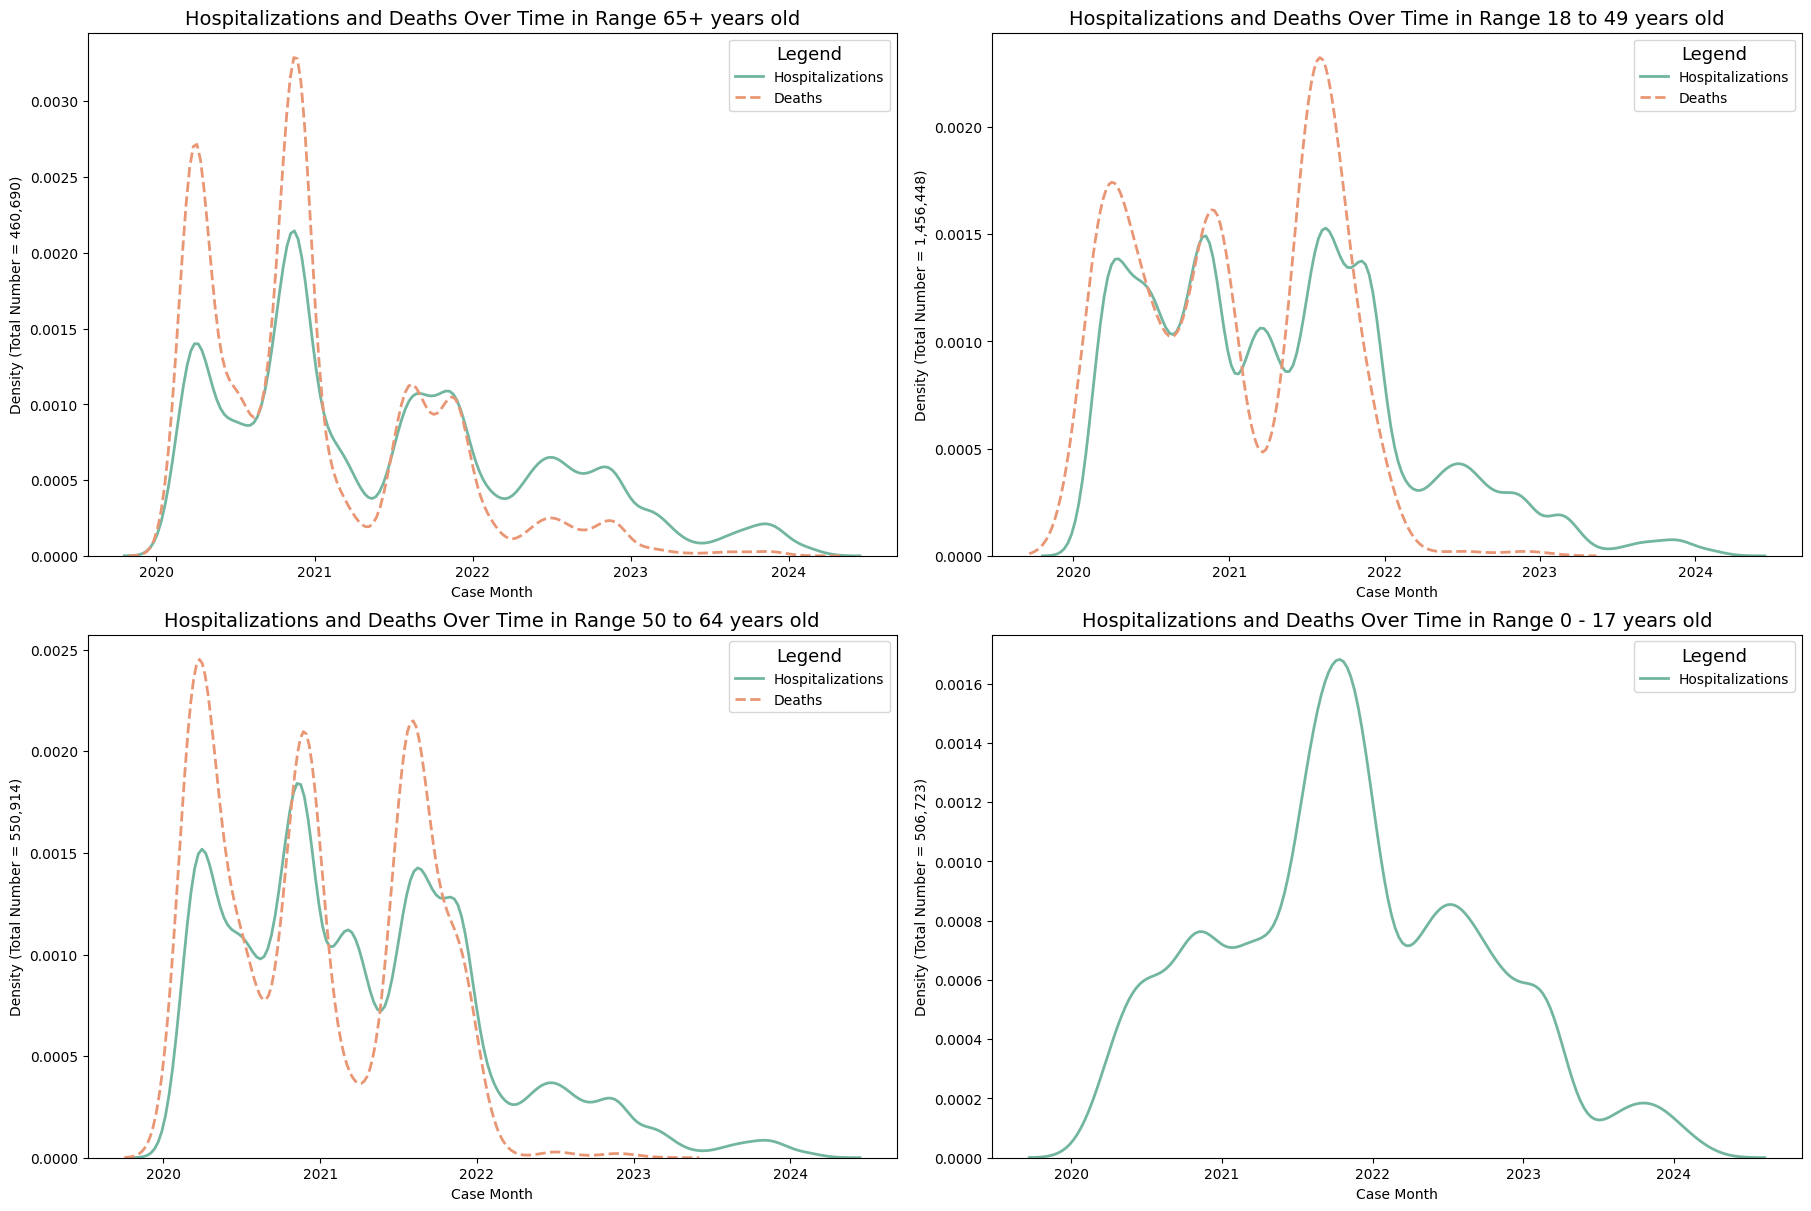

In [ ]:
# List of age_groups for the example
age_groups = df['age_group'].unique()

# Number of age_groups per row
age_groups_per_row = 2
num_age_groups = len(age_groups)
num_rows = (num_age_groups + age_groups_per_row - 1) // age_groups_per_row

# Create subplots
fig, axes = plt.subplots(num_rows, age_groups_per_row, figsize=(
    18, 6 * num_rows), constrained_layout=True)
axes = axes.flatten()

for i, age_group in enumerate(age_groups):
    age_df = df[df["age_group"] == age_group]

    sns.kdeplot(data=age_df[age_df["hosp_yn"] == "Yes"], x="case_month", ax=axes[i],
                color='#72b6a1', linestyle='-', linewidth=2, label='Hospitalizations')
    sns.kdeplot(data=age_df[age_df["death_yn"] == "Yes"], x="case_month",
                ax=axes[i], color='#e99675', linestyle='--', linewidth=2, label='Deaths')

    axes[i].set_xlabel('Case Month')
    axes[i].set_ylabel(f'Density (Total Number = {
                       df[df["age_group"] == age_group].count()["case_month"]:,})')
    axes[i].set_title(f'Hospitalizations and Deaths Over Time in Range {
                      age_group} old', fontsize=14)
    axes[i].xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y'))
    axes[i].xaxis.set_major_locator(plt.matplotlib.dates.YearLocator())
    # Add gridlines for better readability
    axes[i].grid(False)

    # Improve legend
    handles, labels = axes[i].get_legend_handles_labels()
    axes[i].legend(handles=handles, labels=labels,
                   title='Legend', fontsize=10, title_fontsize='13')

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.show()

Conclusion: We can assume that higher chance of death occurs as age increases, especially that no deaths have have taken place for the 17 and younger age group.

### 4. Average rate of COVID-related hospitalization and death per state over the entire study period.

In [ ]:
df = pd.read_csv("../Datasets/DS-1/data.csv",
                 usecols=["hosp_yn", "death_yn", "res_state", "case_month"],
                 dtype={"age_group": "category", "hosp_yn": "category", "death_yn": "category",
                        "res_state": "category", "case_month": "category", "sex": "category",
                        "race": "category"})

In [ ]:
display(df.info())
print("Categories for 'hosp_yn':", df["hosp_yn"].cat.categories)
print("Categories for 'death_yn':", df["death_yn"].cat.categories)
print("Categories for 'res_state':", df["res_state"].cat.categories)
print("Categories for 'case_month':", df["case_month"].cat.categories)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19020962 entries, 0 to 19020961
Data columns (total 4 columns):
 #   Column      Dtype   
---  ------      -----   
 0   case_month  category
 1   res_state   category
 2   hosp_yn     category
 3   death_yn    category
dtypes: category(4)
memory usage: 72.6 MB


None

Categories for 'hosp_yn': Index(['Missing', 'No', 'Unknown', 'Yes'], dtype='object')
Categories for 'death_yn': Index(['Missing', 'No', 'Unknown', 'Yes'], dtype='object')
Categories for 'res_state': Index(['AZ', 'CA', 'FL', 'IL', 'MA', 'MI', 'MN', 'NC', 'NV', 'NY', 'OH', 'PA',
       'TX', 'UT', 'WA', 'NE', 'NH', 'GA', 'OR', 'LA', 'AR', 'MT', 'VA', 'VI',
       'ND', 'AL', 'HI', 'ME', 'KY', 'TN', 'WI', 'DC', 'KS', 'WY', 'OK', 'IA',
       'CO', 'RI', 'MS', 'ID', 'IN', 'SC', 'PR', 'SD', 'AK', 'CT', 'DE', 'GU',
       'MD', 'NJ', 'WV', 'MO', 'NM', 'VT'],
      dtype='object')
Categories for 'case_month': Index(['2020-01', '2020-03', '2020-04', '2020-05', '2020-06', '2020-07',
       '2020-08', '2020-09', '2020-10', '2020-11', '2020-12', '2021-01',
       '2021-02', '2021-03', '2021-04', '2021-05', '2021-06', '2021-07',
       '2021-08', '2021-09', '2021-10', '2021-11', '2021-12', '2022-01',
       '2022-02', '2022-03', '2022-04', '2022-05', '2022-06', '2022-07',
       '2022-08', '2022-0

In [ ]:
df = df[(df["hosp_yn"] != "Unknown") & (df["hosp_yn"] != "Missing")]
df = df[(df["death_yn"] != "Unknown") & (df["death_yn"] != "Missing")]
df = df[(df["res_state"] != "Unknown") & (df["res_state"] != "Missing")]
df = df[(df["case_month"] != "Unknown") & (df["case_month"] != "Missing")]
df["hosp_yn"] = df["hosp_yn"].cat.remove_unused_categories()
df["death_yn"] = df["death_yn"].cat.remove_unused_categories()
df["res_state"] = df["res_state"].cat.remove_unused_categories()
df["case_month"] = df["case_month"].cat.remove_unused_categories()

# Convert 'case_month' from categorical to datetime:
df['case_month'] = df['case_month'].astype(str)
unique_case_months = df['case_month'].unique()
df['case_month'] = df['case_month'].str.replace('-01$', '', regex=True)
df['case_month'] = pd.to_datetime(
    df['case_month'], format='%Y-%m', errors='coerce')

df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

In [ ]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3017733 entries, 0 to 3017732
Data columns (total 4 columns):
 #   Column      Dtype         
---  ------      -----         
 0   case_month  datetime64[ns]
 1   res_state   category      
 2   hosp_yn     category      
 3   death_yn    category      
dtypes: category(3), datetime64[ns](1)
memory usage: 31.7 MB


None

/tmp/ipykernel_9744/860455779.py:18: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=state_df[state_df["death_yn"] == "Yes"], x="case_month",
/tmp/ipykernel_9744/860455779.py:16: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=state_df[state_df["hosp_yn"] == "Yes"], x="case_month", ax=axes[i],
/tmp/ipykernel_9744/860455779.py:18: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=state_df[state_df["death_yn"] == "Yes"], x="case_month",
/tmp/ipykernel_9744/860455779.py:33: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[i].legend(handles=handles, labels=labels,
/tmp/ipykernel_9744/860455779.py:16: UserWarni

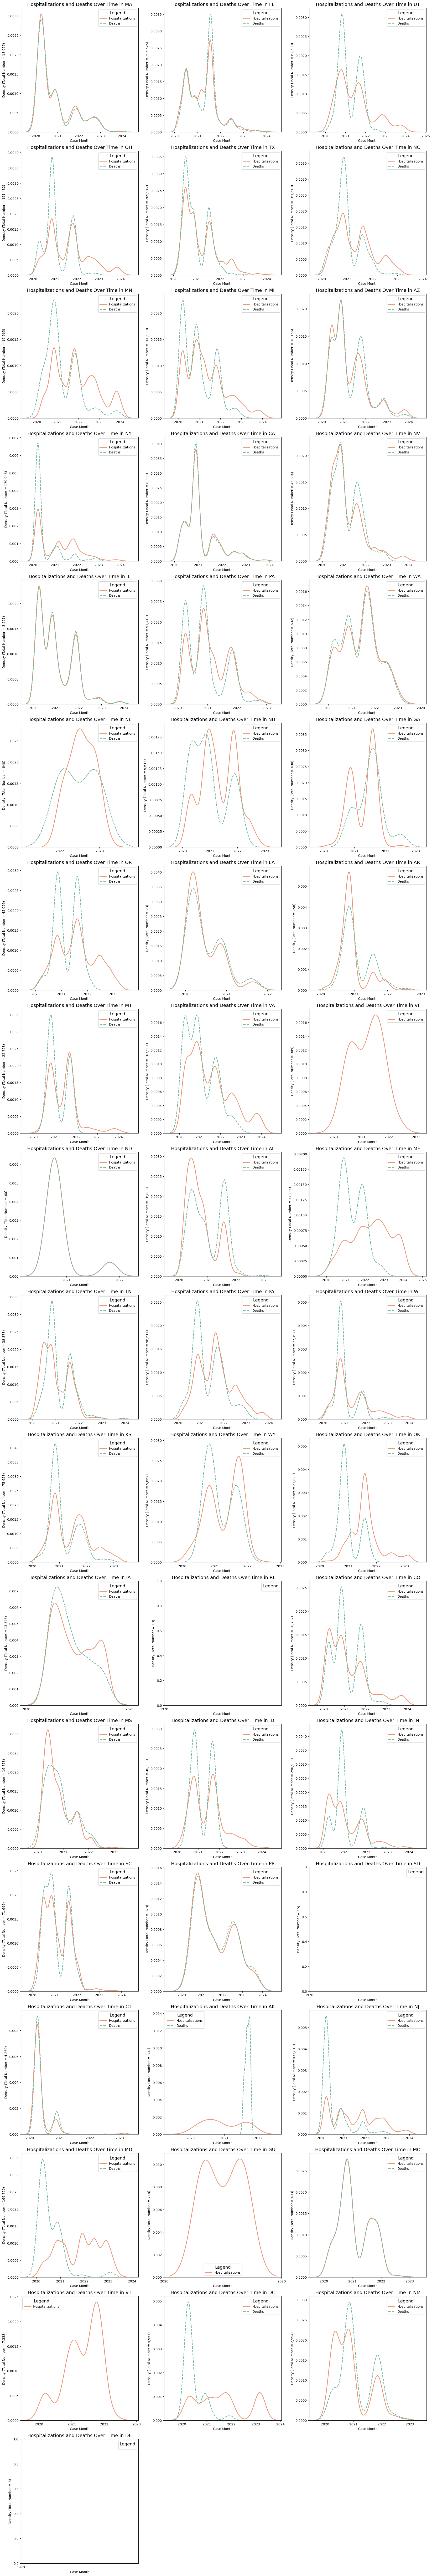

In [ ]:
# List of states for the example
states = df['res_state'].unique()

# Number of states per row
states_per_row = 3
num_states = len(states)
num_rows = (num_states + states_per_row - 1) // states_per_row

# Create subplots
fig, axes = plt.subplots(num_rows, states_per_row, figsize=(
    18, 6 * num_rows), constrained_layout=True)
axes = axes.flatten()
for i, state in enumerate(states):
    state_df = df[df["res_state"] == state]

    sns.kdeplot(data=state_df[state_df["hosp_yn"] == "Yes"], x="case_month", ax=axes[i],
                color='#e99675', linestyle='-', linewidth=2, label='Hospitalizations')
    sns.kdeplot(data=state_df[state_df["death_yn"] == "Yes"], x="case_month",
                ax=axes[i], color='#72b6a1', linestyle='--', linewidth=2, label='Deaths')

    axes[i].set_xlabel('Case Month')
    axes[i].set_ylabel(f'Density (Total Number = {
                       df[df["res_state"] == state].count()["case_month"]:,})')
    axes[i].set_title(f'Hospitalizations and Deaths Over Time in {
                      state}', fontsize=14)
    axes[i].xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y'))
    axes[i].xaxis.set_major_locator(plt.matplotlib.dates.YearLocator())
    # Add gridlines for better readability
    axes[i].grid(False)

    # Improve legend
    handles, labels = axes[i].get_legend_handles_labels()
    axes[i].legend(handles=handles, labels=labels,
                   title='Legend', fontsize=10, title_fontsize='13')

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.show()

Conclusion: The deaths and hospitalizations are not consistent between states. We can see completely different looking distributions as well as different means.

### 6. The rate of expected employment loss due to COVID-19 and sector of employment.

In [ ]:
df = pd.read_csv("../Datasets/DS-2/data2.csv",
                 usecols=["kindwork", "expctloss"],
                 dtype={"kindwork": "category", "expctloss": "category"})

In [ ]:
print(df.info())
print(df.shape)
print("Categories for 'kindwork':", df["kindwork"].cat.categories)
print("Categories for 'expctloss':", df["expctloss"].cat.categories)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1088314 entries, 0 to 1088313
Data columns (total 2 columns):
 #   Column     Non-Null Count    Dtype   
---  ------     --------------    -----   
 0   expctloss  1088314 non-null  category
 1   kindwork   1088314 non-null  category
dtypes: category(2)
memory usage: 2.1 MB
None
(1088314, 2)
Categories for 'kindwork': Index(['-88', '-99', '1', '2', '3', '4', '5'], dtype='object')
Categories for 'expctloss': Index(['-99', '1', '2'], dtype='object')


An extra step needs to take place when using this dataset, mapping the numerical data to it's actual definitions.

In [ ]:
# Define the mapping dictionaries
mapping_dict_kindwork = {
    '1': 'Government',
    '2': 'Private company',
    '3': 'Non-profit organization including tax exempt and charitable organizations',
    '4': 'Self-employed',
    '5': 'Working in a family business',
}
yes_no = {
    '1': 'Yes',
    '2': 'No',
}

In [ ]:
# Filter out missing values
df = df[(df['kindwork'] != "-99") & (df['kindwork'] != "-88")]
df = df[(df['expctloss'] != "-99") & (df['expctloss'] != "-88")]

# Remove unused categories
df['expctloss'] = df['expctloss'].cat.remove_unused_categories()
df['kindwork'] = df['kindwork'].cat.remove_unused_categories()
df.reset_index(drop=True, inplace=True)

In [ ]:
# Use rename_categories to replace the codes with the names
df['kindwork'] = df['kindwork'].cat.rename_categories(mapping_dict_kindwork)
df['expctloss'] = df['expctloss'].cat.rename_categories(yes_no)
# Check the updated categories
pprint(df['kindwork'].cat.categories.to_list())
pprint(df['expctloss'].cat.categories.to_list())

['Government',
 'Private company',
 'Non-profit organization including tax exempt and charitable organizations',
 'Self-employed',
 'Working in a family business']
['Yes', 'No']


/tmp/ipykernel_9744/278838080.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grouped_kindwork = df.groupby(['kindwork', 'expctloss']).size().reset_index(name='count')
/tmp/ipykernel_9744/278838080.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_total_kindwork = df_grouped_kindwork.groupby('kindwork')['count'].transform('sum')
/tmp/ipykernel_9744/278838080.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(wrapped_labels)


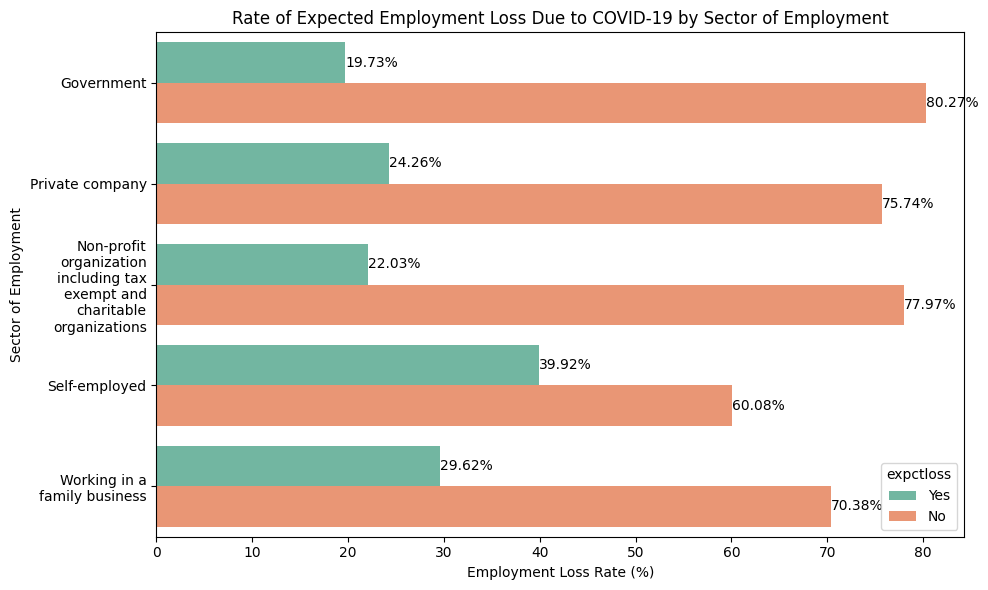

In [ ]:
# Calculate the percentage for each combination
df_grouped_kindwork = df.groupby(['kindwork', 'expctloss']).size().reset_index(name='count')
df_total_kindwork = df_grouped_kindwork.groupby('kindwork')['count'].transform('sum')
df_grouped_kindwork['percent'] = df_grouped_kindwork['count'] / df_total_kindwork * 100

# Create the plot
plt.figure(figsize=(10, 6))
p1 = sns.barplot(data=df_grouped_kindwork, y='kindwork', x='percent', hue='expctloss', dodge=True, palette='Set2')

# Add percentage labels on top of bars
for container in p1.containers:
    labels = [f'{(v):.2f}%' for v in container.datavalues]
    p1.bar_label(container, labels=labels, label_type='edge')

plt.title('Rate of Expected Employment Loss Due to COVID-19 by Sector of Employment')
plt.xlabel('Employment Loss Rate (%)')
plt.ylabel('Sector of Employment')

# Get the current y-axis labels
labels = [item.get_text() for item in plt.gca().get_yticklabels()]

# Wrap the labels
wrapped_labels = [textwrap.fill(label, 15) for label in labels]

# Set the wrapped labels
plt.gca().set_yticklabels(wrapped_labels)

plt.tight_layout()
plt.show()


Conclusion: we can see that some sectors are more afraid of their job being at risk that others.

### 7. The rate of expected employment loss due to COVID-19 relative to responders demographics (Part 1).

In [ ]:
df = pd.read_csv("../Datasets/DS-2/data2.csv",
                 usecols=["egender", "rrace", "expctloss"],
                 dtype={"egender": "category", "rrace": "category", "expctloss": "category"})

In [ ]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1088314 entries, 0 to 1088313
Data columns (total 3 columns):
 #   Column     Non-Null Count    Dtype   
---  ------     --------------    -----   
 0   egender    1088314 non-null  category
 1   rrace      1088314 non-null  category
 2   expctloss  1088314 non-null  category
dtypes: category(3)
memory usage: 3.1 MB


None

In [ ]:
# Define the mapping dictionaries
mapping_dict_gender = {
    '1': 'Male',
    '2': 'Female'
}
mapping_dict_race = {
    '1': 'White, Alone',
    '2': 'Black, Alone',
    '3': 'Asian, Alone',
    '4': 'Any other race alone, or race in combination'
}

In [ ]:
# Filter out unwanted categories
df = df[(df['egender'] != "-99") & (df['egender'] != "-88")]
df = df[(df['rrace'] != "-99") & (df['rrace'] != "-88")]
df = df[(df['expctloss'] != "-99") & (df['expctloss'] != "-88")]

# Remove unused categories
df['egender'] = df['egender'].cat.remove_unused_categories()
df['rrace'] = df['rrace'].cat.remove_unused_categories()
df['expctloss'] = df['expctloss'].cat.remove_unused_categories()

In [ ]:
# Use rename_categories to replace the codes with the names
df['egender'] = df['egender'].cat.rename_categories(mapping_dict_gender)
df['rrace'] = df['rrace'].cat.rename_categories(mapping_dict_race)
df['expctloss'] = df['expctloss'].cat.rename_categories(yes_no)

In [ ]:
display(df.info())
print("Categories for 'egender':", df["egender"].cat.categories)
print("Categories for 'rrace':", df["rrace"].cat.categories)
print("Categories for 'expctloss':", df["expctloss"].cat.categories)

<class 'pandas.core.frame.DataFrame'>
Index: 1081146 entries, 0 to 1088313
Data columns (total 3 columns):
 #   Column     Non-Null Count    Dtype   
---  ------     --------------    -----   
 0   egender    1081146 non-null  category
 1   rrace      1081146 non-null  category
 2   expctloss  1081146 non-null  category
dtypes: category(3)
memory usage: 11.3 MB


None

Categories for 'egender': Index(['Male', 'Female'], dtype='object')
Categories for 'rrace': Index(['White, Alone', 'Black, Alone', 'Asian, Alone',
       'Any other race alone, or race in combination'],
      dtype='object')
Categories for 'expctloss': Index(['Yes', 'No'], dtype='object')


/tmp/ipykernel_9744/1487095067.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grouped_egender = df.groupby(['egender', 'expctloss']).size().reset_index(name='count')
/tmp/ipykernel_9744/1487095067.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_total_egender = df_grouped_egender.groupby('egender')['count'].transform('sum')
/tmp/ipykernel_9744/1487095067.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  d

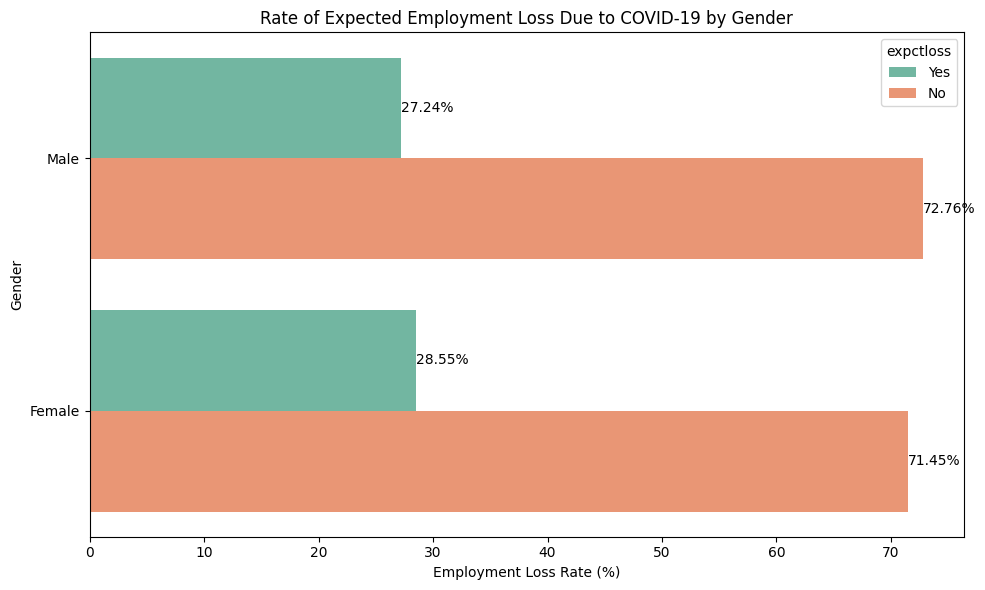

/tmp/ipykernel_9744/1487095067.py:56: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(wrapped_labels)


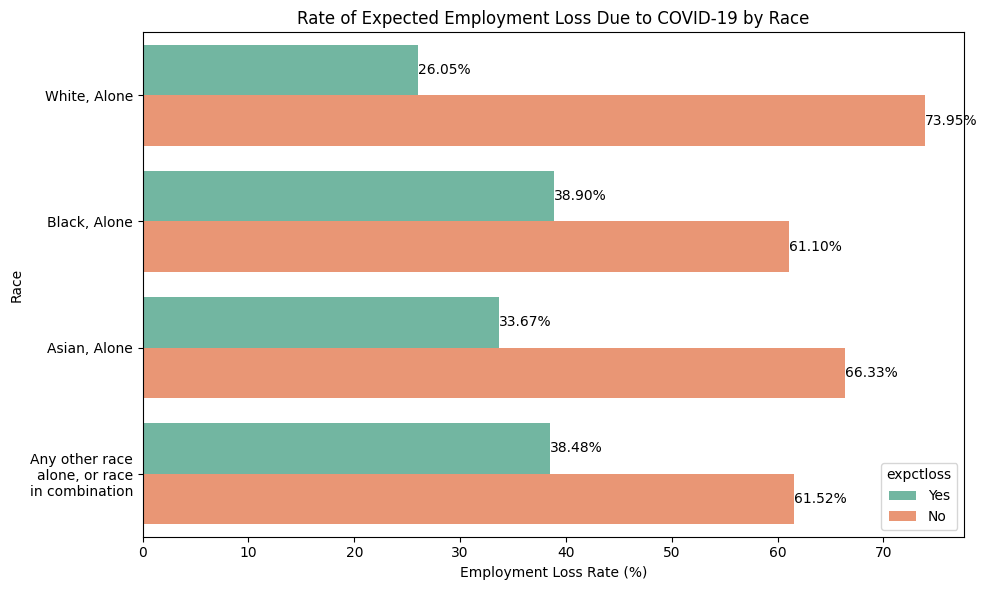

In [ ]:
# Calculate the percentage for each combination
df_grouped_egender = df.groupby(['egender', 'expctloss']).size().reset_index(name='count')
df_total_egender = df_grouped_egender.groupby('egender')['count'].transform('sum')
df_grouped_egender['percent'] = df_grouped_egender['count'] / df_total_egender * 100

df_grouped_rrace = df.groupby(['rrace', 'expctloss']).size().reset_index(name='count')
df_total_rrace = df_grouped_rrace.groupby('rrace')['count'].transform('sum')
df_grouped_rrace['percent'] = df_grouped_rrace['count'] / df_total_rrace * 100

# Plot the category vs work loss rate as a horizontal bar chart for egender
plt.figure(figsize=(10, 6))
p1 = sns.barplot(data=df_grouped_egender, y='egender', x='percent', hue='expctloss', dodge=True, palette='Set2')

# Add percentage labels on top of bars
for container in p1.containers:
    labels = [f'{(v):.2f}%' for v in container.datavalues]
    p1.bar_label(container, labels=labels, label_type='edge')

plt.title('Rate of Expected Employment Loss Due to COVID-19 by Gender')
plt.xlabel('Employment Loss Rate (%)')
plt.ylabel('Gender')

# Get the current y-axis labels
labels = [item.get_text() for item in plt.gca().get_yticklabels()]

# Wrap the labels
wrapped_labels = [textwrap.fill(label, 15) for label in labels]

# Set the wrapped labels
plt.gca().set_yticklabels(wrapped_labels)

plt.tight_layout()
plt.show()

# Plot the category vs work loss rate as a horizontal bar chart for rrace
plt.figure(figsize=(10, 6))
p1 = sns.barplot(data=df_grouped_rrace, y='rrace', x='percent', hue='expctloss', dodge=True, palette='Set2')

# Add percentage labels on top of bars
for container in p1.containers:
    labels = [f'{(v):.2f}%' for v in container.datavalues]
    p1.bar_label(container, labels=labels, label_type='edge')

plt.title('Rate of Expected Employment Loss Due to COVID-19 by Race')
plt.xlabel('Employment Loss Rate (%)')
plt.ylabel('Race')

# Get the current y-axis labels
labels = [item.get_text() for item in plt.gca().get_yticklabels()]

# Wrap the labels
wrapped_labels = [textwrap.fill(label, 15) for label in labels]

# Set the wrapped labels
plt.gca().set_yticklabels(wrapped_labels)

plt.tight_layout()
plt.show()


### 7. The rate of expected employment loss due to COVID-19 relative to responders demographics (Part 2, age only).

In [ ]:
df = pd.read_csv("../Datasets/DS-2/data2.csv",
                 usecols=["tbirth_year", "expctloss"],
                 dtype={"tbirth_year": "category", "expctloss": "category"})

In [ ]:
# Filter out unwanted categories
df = df[(df['tbirth_year'] != "-99") & (df['tbirth_year'] != "-88")]
df = df[(df['expctloss'] != "-99") & (df['expctloss'] != "-88")]

# Remove unused categories
df['tbirth_year'] = df['tbirth_year'].cat.remove_unused_categories()
df['expctloss'] = df['expctloss'].cat.remove_unused_categories()

# Convert tbirth_year to numeric for plotting
df['tbirth_year'] = df['tbirth_year'].astype(int)

# Use rename_categories to replace the codes with the names
df['expctloss'] = df['expctloss'].cat.rename_categories(yes_no)

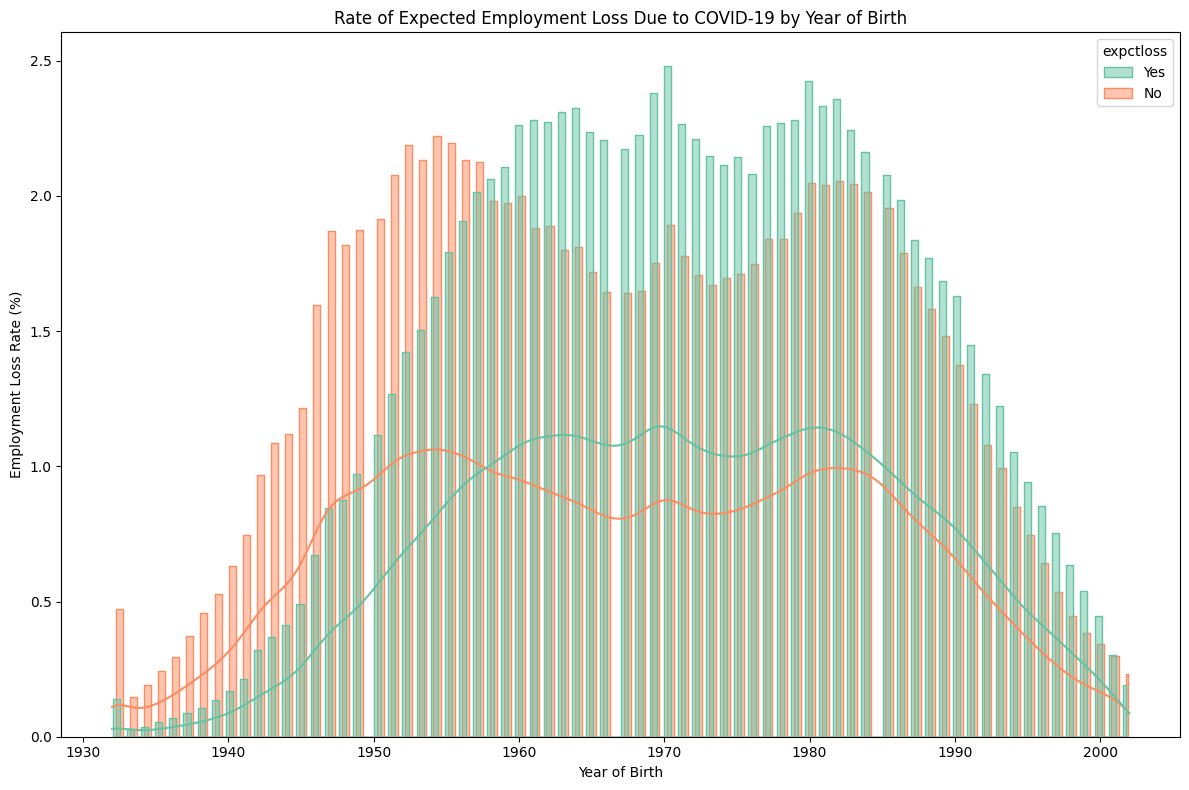

In [ ]:
# Plot the category vs work loss rate as a horizontal bar chart for tbirth_year
plt.figure(figsize=(12, 8))
sns.histplot(common_norm=False,data=df, x='tbirth_year', hue='expctloss', multiple='dodge',
             shrink=.8, stat='percent', palette='Set2', element="step", fill=True, kde=True)

plt.title('Rate of Expected Employment Loss Due to COVID-19 by Year of Birth')
plt.ylabel('Employment Loss Rate (%)')
plt.xlabel('Year of Birth')


plt.tight_layout()
plt.show()

Conclusion: We can see that certain demographics believe they are more at risk of job loss than others

### 8. The relationship between household income and the rate of delayed/ OR unobtained medical treatment (Due to COVID or otherwise)

In [ ]:
df = pd.read_csv("../Datasets/DS-2/data2.csv",
                 usecols=["est_st","expctloss"],
                 dtype={"est_st": "category", "expctloss": "category"})
df_hospitalization = pd.read_csv("../Datasets/DS-1/data.csv", dtype={
                                 "res_state": "category", "hosp_yn": "category"}, usecols=["res_state", "hosp_yn"])

In [ ]:
display(df.info())
display(df_hospitalization.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1088314 entries, 0 to 1088313
Data columns (total 2 columns):
 #   Column     Non-Null Count    Dtype   
---  ------     --------------    -----   
 0   est_st     1088314 non-null  category
 1   expctloss  1088314 non-null  category
dtypes: category(2)
memory usage: 2.1 MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19020962 entries, 0 to 19020961
Data columns (total 2 columns):
 #   Column     Dtype   
---  ------     -----   
 0   res_state  category
 1   hosp_yn    category
dtypes: category(2)
memory usage: 36.3 MB


None

Question specific step: Find the top 10 states at risk for hospitalization.

In [ ]:
# Filter the dataframe for hospitalized cases
hospitalized_cases = df_hospitalization[df_hospitalization['hosp_yn'].str.lower(
) == 'yes']

# Handle missing values
hospitalized_cases = hospitalized_cases.dropna(subset=['res_state'])

# Get the states with the most hospitalized cases
state_hospitalization_counts = hospitalized_cases['res_state'].value_counts(
).sort_values(ascending=False)

# Display the top states
top_10_states = state_hospitalization_counts.head(10)
display(top_10_states)
top_10_states = top_10_states.index.tolist()

res_state
CA    73075
NY    57054
NJ    45461
IL    38518
TX    32327
AZ    31217
FL    30167
OH    27260
PA    21723
MN    17539
Name: count, dtype: int64

Question specific step: Map the states from the format of dataset 1 to the format of dataset 2

In [ ]:
# Define the state mapping dictionary
state_map = {
    'AL': '01', 'AK': '02', 'AZ': '04', 'AR': '05', 'CA': '06', 'CO': '08', 'CT': '09', 'DE': '10',
    'DC': '11', 'FL': '12', 'GA': '13', 'HI': '15', 'ID': '16', 'IL': '17', 'IN': '18', 'IA': '19',
    'KS': '20', 'KY': '21', 'LA': '22', 'ME': '23', 'MD': '24', 'MA': '25', 'MI': '26', 'MN': '27',
    'MS': '28', 'MO': '29', 'MT': '30', 'NE': '31', 'NV': '32', 'NH': '33', 'NJ': '34', 'NM': '35',
    'NY': '36', 'NC': '37', 'ND': '38', 'OH': '39', 'OK': '40', 'OR': '41', 'PA': '42', 'RI': '44',
    'SC': '45', 'SD': '46', 'TN': '47', 'TX': '48', 'UT': '49', 'VT': '50', 'VA': '51', 'WA': '53',
    'WV': '54', 'WI': '55', 'WY': '56', 'PR': '72', 'GU': '66', 'VI': '78', 'MP': '69', 'AS': '60'
}
state_mapping_inv = {
    '01': 'Alabama', '02': 'Alaska', '04': 'Arizona', '05': 'Arkansas', '06': 'California', '08': 'Colorado',
    '09': 'Connecticut', '10': 'Delaware', '11': 'District of Columbia', '12': 'Florida', '13': 'Georgia',
    '15': 'Hawaii', '16': 'Idaho', '17': 'Illinois', '18': 'Indiana', '19': 'Iowa', '20': 'Kansas', '21': 'Kentucky',
    '22': 'Louisiana', '23': 'Maine', '24': 'Maryland', '25': 'Massachusetts', '26': 'Michigan', '27': 'Minnesota',
    '28': 'Mississippi', '29': 'Missouri', '30': 'Montana', '31': 'Nebraska', '32': 'Nevada', '33': 'New Hampshire',
    '34': 'New Jersey', '35': 'New Mexico', '36': 'New York', '37': 'North Carolina', '38': 'North Dakota',
    '39': 'Ohio', '40': 'Oklahoma', '41': 'Oregon', '42': 'Pennsylvania', '44': 'Rhode Island', '45': 'South Carolina',
    '46': 'South Dakota', '47': 'Tennessee', '48': 'Texas', '49': 'Utah', '50': 'Vermont', '51': 'Virginia',
    '53': 'Washington', '54': 'West Virginia', '55': 'Wisconsin', '56': 'Wyoming'
}

Question specific step: Get the states as their number representation in the second dataset.

In [ ]:
pprint(top_10_states)
top_10_full = [state_map[state] for state in top_10_states]
pprint(top_10_full)

['CA', 'NY', 'NJ', 'IL', 'TX', 'AZ', 'FL', 'OH', 'PA', 'MN']
['06', '36', '34', '17', '48', '04', '12', '39', '42', '27']


In [ ]:
df = df[df['est_st'].isin(top_10_full)]

df = df[(df['expctloss'] != "-99") & (df['expctloss'] != "-88")]

df['expctloss'] = df['expctloss'].cat.remove_unused_categories()
df['expctloss'] = df['expctloss'].cat.rename_categories(yes_no)
df['est_st'] = df['est_st'].cat.rename_categories(state_mapping_inv)
df['est_st'] = df['est_st'].cat.remove_unused_categories()
df.reset_index(drop=True, inplace=True)

/tmp/ipykernel_9744/3919436925.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grouped_est_st = df.groupby(['est_st', 'expctloss']).size().reset_index(name='count')
/tmp/ipykernel_9744/3919436925.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_total_est_st = df_grouped_est_st.groupby('est_st')['count'].transform('sum')
/tmp/ipykernel_9744/3919436925.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(wrapped_labels)


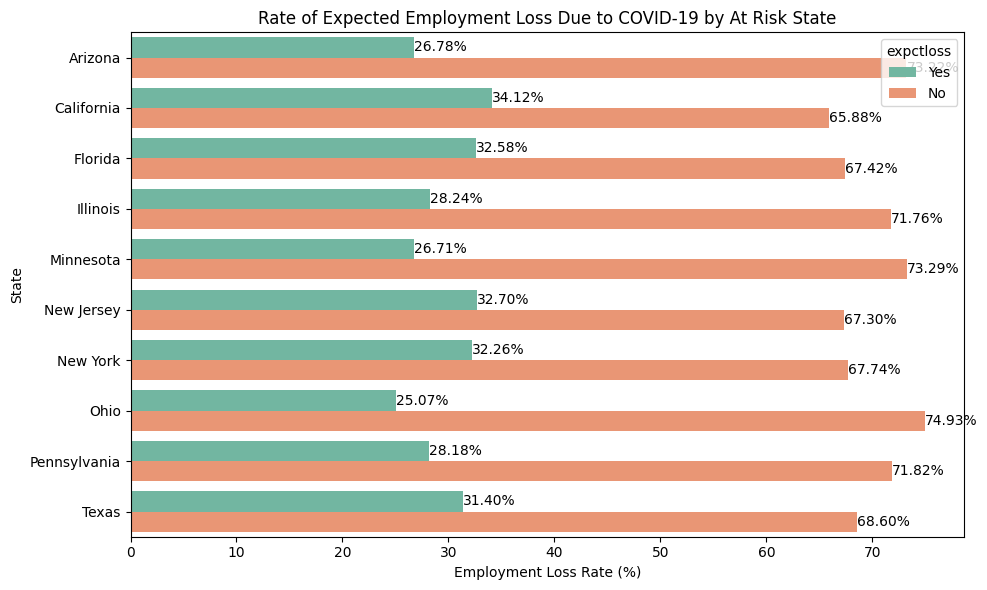

In [ ]:
# Calculate the percentage for each combination
df_grouped_est_st = df.groupby(['est_st', 'expctloss']).size().reset_index(name='count')
df_total_est_st = df_grouped_est_st.groupby('est_st')['count'].transform('sum')
df_grouped_est_st['percent'] = df_grouped_est_st['count'] / df_total_est_st * 100

# Plot the category vs work loss rate as a horizontal bar chart
plt.figure(figsize=(10, 6))
p1 = sns.barplot(data=df_grouped_est_st, y='est_st', x='percent', hue='expctloss', dodge=True, palette='Set2')

# Add percentage labels on top of bars
for container in p1.containers:
    labels = [f'{(v):.2f}%' for v in container.datavalues]
    p1.bar_label(container, labels=labels, label_type='edge')

plt.title('Rate of Expected Employment Loss Due to COVID-19 by At Risk State')
plt.xlabel('Employment Loss Rate (%)')
plt.ylabel('State')

# Get the current y-axis labels
labels = [item.get_text() for item in plt.gca().get_yticklabels()]

# Wrap the labels
wrapped_labels = [textwrap.fill(label, 15) for label in labels]

# Set the wrapped labels
plt.gca().set_yticklabels(wrapped_labels)

plt.tight_layout()
plt.show()


Conclusion: The top 10 states have high expectations of job loss.

### 9. The relationship between household income and the rate of delayed/ OR unobtained medical treatment (Due to COVID or otherwise).

In [ ]:
df = pd.read_csv("../Datasets/DS-2/data2.csv",
                 usecols=["income", "delay", "notget"],
                 dtype={
                     "delay": "category",
                     "notget": "category",
                     "income": "category"
                 })

In [ ]:
print(df.info())
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1088314 entries, 0 to 1088313
Data columns (total 3 columns):
 #   Column  Non-Null Count    Dtype   
---  ------  --------------    -----   
 0   delay   1088314 non-null  category
 1   notget  1088314 non-null  category
 2   income  1088314 non-null  category
dtypes: category(3)
memory usage: 3.1 MB
None
(1088314, 3)


In [ ]:
print("Categories for 'delay':", df["delay"].cat.categories)
print("Categories for 'notget':", df["notget"].cat.categories)
print("Categories for 'income':", df["income"].cat.categories)
df = df[(df["delay"] != "-99") & (df["delay"] != "-88")]
df = df[(df["notget"] != "-99") & (df["notget"] != "-88")]
df = df[(df["income"] != "-99") & (df["income"] != "-88")]
df["delay"] = df["delay"].cat.remove_unused_categories()
df["notget"] = df["notget"].cat.remove_unused_categories()
df["income"] = df["income"].cat.remove_unused_categories()
df.reset_index(drop=True, inplace=True)

Categories for 'delay': Index(['-88', '-99', '1', '2'], dtype='object')
Categories for 'notget': Index(['-88', '-99', '1', '2'], dtype='object')
Categories for 'income': Index(['-88', '-99', '1', '2', '3', '4', '5', '6', '7', '8'], dtype='object')


In [ ]:
print(df.info())
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940744 entries, 0 to 940743
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype   
---  ------  --------------   -----   
 0   delay   940744 non-null  category
 1   notget  940744 non-null  category
 2   income  940744 non-null  category
dtypes: category(3)
memory usage: 2.7 MB
None
(940744, 3)


In [ ]:
income_categories = {
    "1": "Less than $25,000",
    "2": "$25,000 - $34,999",
    "3": "$35,000 - $49,999",
    "4": "$50,000 - $74,999",
    "5": "$75,000 - $99,999",
    "6": "$100,000 - $149,999",
    "7": "$150,000 - $199,999",
    "8": "$200,000 and above",
    "-99": "Question seen but not selected",
    "-88": "Missing / Did not report"
}

In [ ]:
df['delay'] = df['delay'].cat.rename_categories(yes_no)
df['notget'] = df['notget'].cat.rename_categories(yes_no)
df["income"] = df["income"].cat.rename_categories(income_categories)

print("Categories for 'delay':", df["delay"].cat.categories)
print("Categories for 'notget':", df["notget"].cat.categories)
print("Categories for 'income':", df["income"].cat.categories)

Categories for 'delay': Index(['Yes', 'No'], dtype='object')
Categories for 'notget': Index(['Yes', 'No'], dtype='object')
Categories for 'income': Index(['Less than $25,000', '$25,000 - $34,999', '$35,000 - $49,999',
       '$50,000 - $74,999', '$75,000 - $99,999', '$100,000 - $149,999',
       '$150,000 - $199,999', '$200,000 and above'],
      dtype='object')


Question specific step: creating a column that is an or between "delayed" and "delayed due to covid"

In [ ]:
df['delay_or_notget'] = ((df['delay'] == "Yes") | (
    df['notget'] == "No")).map({True: 'Yes', False: 'No'})

/tmp/ipykernel_9744/2256959934.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grouped_income = df.groupby(['income', 'delay_or_notget']).size().reset_index(name='count')
/tmp/ipykernel_9744/2256959934.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_total_income = df_grouped_income.groupby('income')['count'].transform('sum')
/tmp/ipykernel_9744/2256959934.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(wrapped_labels)


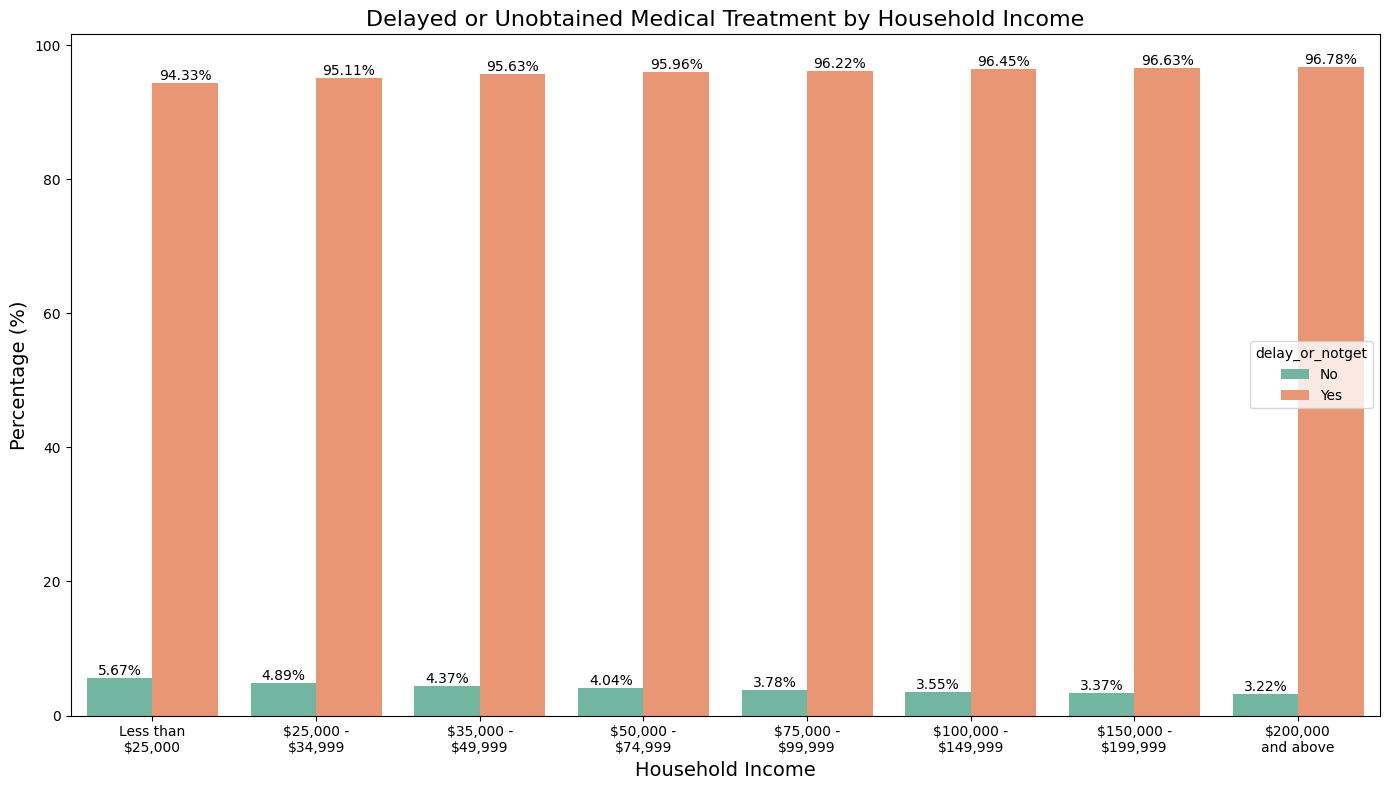

In [ ]:
# Calculate the percentage for each combination
df_grouped_income = df.groupby(['income', 'delay_or_notget']).size().reset_index(name='count')
df_total_income = df_grouped_income.groupby('income')['count'].transform('sum')
df_grouped_income['percent'] = df_grouped_income['count'] / df_total_income * 100

# Create the plot
plt.figure(figsize=(14, 8))
ax = sns.barplot(data=df_grouped_income, x='income', y='percent', hue='delay_or_notget', dodge=True, palette='Set2')

# Annotate percentages on the plot
for container in ax.containers:
    labels = [f'{(v):.2f}%' for v in container.datavalues]
    ax.bar_label(container, labels=labels, label_type='edge')

# Set the plot labels and title
plt.title('Delayed or Unobtained Medical Treatment by Household Income', fontsize=16)
plt.xlabel('Household Income', fontsize=14)
plt.ylabel('Percentage (%)', fontsize=14)

# Wrap x labels
labels = [item.get_text() for item in plt.gca().get_xticklabels()]
wrapped_labels = ['\n'.join(textwrap.wrap(label, 10)) for label in labels]
plt.gca().set_xticklabels(wrapped_labels)

plt.tight_layout()
plt.show()

Since it is not too obvious, we added an extra test.

In [ ]:
# Create a contingency table for the chi-square test
contingencyy_table = pd.crosstab(df['income'], df['delay_or_notget'])

# Perform the chi-square test of independence
chi2, p, dof, expected = chi2_contingency(contingencyy_table)

# Print the test results
print(f'Chi-square statistic: {chi2}')
print(f'p-value: {p}')
print(f'Degrees of freedom: {dof}')
print('Expected frequencies:')
print(expected)

# Interpretation of the results
alpha = 0.05
if p < alpha:
    print("Reject the null hypothesis: There is a significant relationship between \
          household income and the rate of delayed or unobtained medical treatment.")
else:
    print("Fail to reject the null hypothesis: There is no significant relationship between \
        household income and the rate of delayed or unobtained medical treatment.")

Chi-square statistic: 1264.6975702900409
p-value: 7.193581205977289e-269
Degrees of freedom: 7
Expected frequencies:
[[  4193.89986011  98921.10013989]
 [  3435.93527889  81043.06472111]
 [  4237.62232871  99952.37767129]
 [  6807.44600869 160566.55399131]
 [  5615.55117864 132453.44882136]
 [  6914.16950414 163083.83049586]
 [  3291.87482886  77645.12517114]
 [  3765.50101196  88816.49898804]]
Reject the null hypothesis: There is a significant relationship between           household income and the rate of delayed or unobtained medical treatment.


Conclusion: We can see that the household income does effect the risk of delayed medical treatment

### 10. The relationship between COVID-19 symptom manifestation and age group.

In [ ]:
df = pd.read_csv("../Datasets/DS-1/data.csv",
                 usecols=["age_group", "symptom_status"],
                 dtype={"age_group": "category", "symptom_status": "category"})

In [ ]:
print(df.info())
print(df.shape)
print("Categories for 'age_group':", df["age_group"].cat.categories)
print("Categories for 'symptom_status':", df["symptom_status"].cat.categories)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19020962 entries, 0 to 19020961
Data columns (total 2 columns):
 #   Column          Dtype   
---  ------          -----   
 0   age_group       category
 1   symptom_status  category
dtypes: category(2)
memory usage: 36.3 MB
None
(19020962, 2)
Categories for 'age_group': Index(['0 - 17 years', '18 to 49 years', '50 to 64 years', '65+ years',
       'Missing'],
      dtype='object')
Categories for 'symptom_status': Index(['Asymptomatic', 'Missing', 'Symptomatic', 'Unknown'], dtype='object')


In [ ]:
df = df[(df["age_group"] != "Unknown") & (df["age_group"] != "Missing")]
df = df[(df["symptom_status"] != "Unknown") &
        (df["symptom_status"] != "Missing")]
df["age_group"] = df["age_group"].cat.remove_unused_categories()
df["symptom_status"] = df["symptom_status"].cat.remove_unused_categories()
df.reset_index(drop=True, inplace=True)

In [ ]:
print("Categories for 'age_group':", df["age_group"].cat.categories)
print("Categories for 'symptom_status':", df["symptom_status"].cat.categories)
print(df.info())
print(df.shape)

Categories for 'age_group': Index(['0 - 17 years', '18 to 49 years', '50 to 64 years', '65+ years'], dtype='object')
Categories for 'symptom_status': Index(['Asymptomatic', 'Symptomatic'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6773424 entries, 0 to 6773423
Data columns (total 2 columns):
 #   Column          Dtype   
---  ------          -----   
 0   age_group       category
 1   symptom_status  category
dtypes: category(2)
memory usage: 12.9 MB
None
(6773424, 2)


/tmp/ipykernel_9744/837964244.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grouped_age = df.groupby(['age_group', 'symptom_status']).size().reset_index(name='count')
/tmp/ipykernel_9744/837964244.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_total_age = df_grouped_age.groupby('age_group')['count'].transform('sum')
/tmp/ipykernel_9744/837964244.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(wrapped_labels)


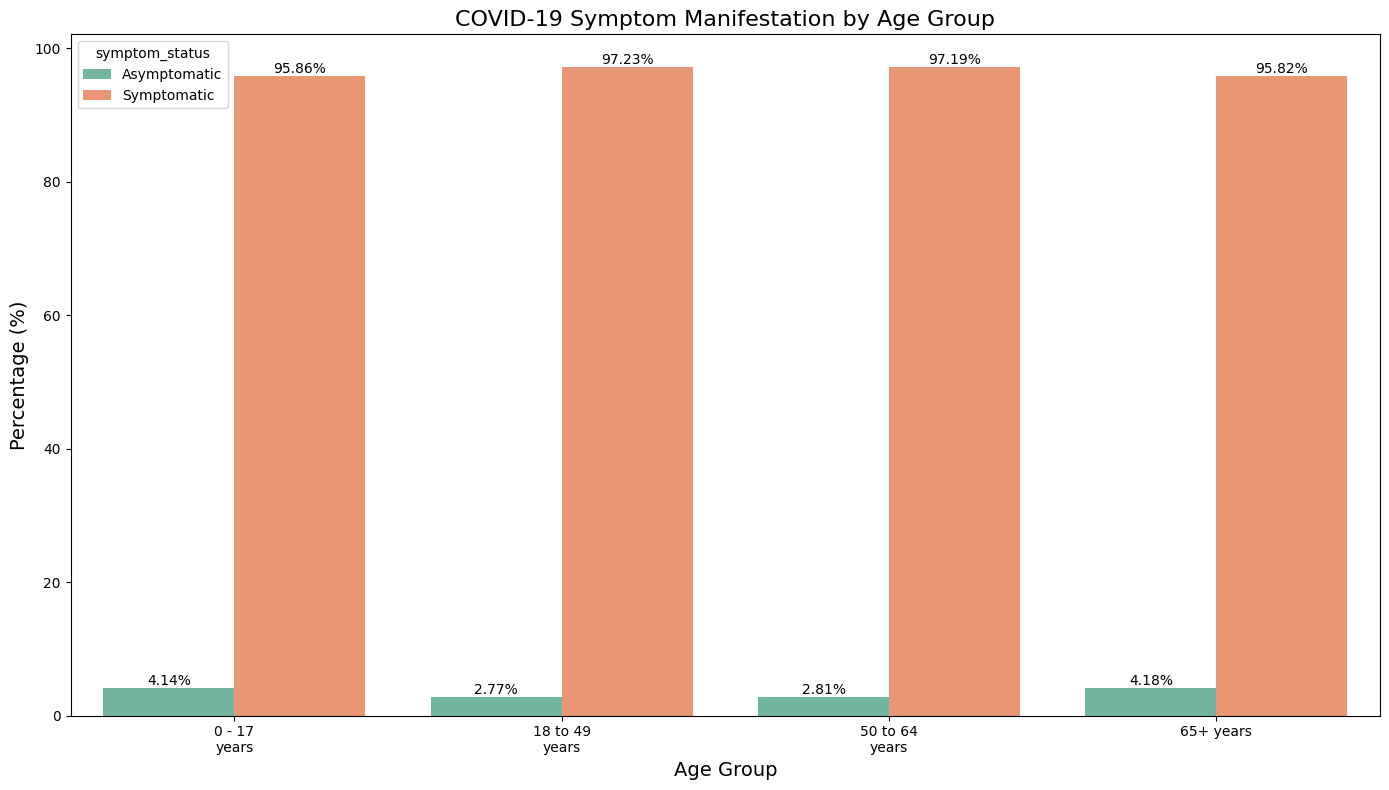

In [ ]:
# Calculate the percentage for each combination
df_grouped_age = df.groupby(['age_group', 'symptom_status']).size().reset_index(name='count')
df_total_age = df_grouped_age.groupby('age_group')['count'].transform('sum')
df_grouped_age['percent'] = df_grouped_age['count'] / df_total_age * 100

# Create the plot
plt.figure(figsize=(14, 8))
ax = sns.barplot(data=df_grouped_age, x='age_group', y='percent', hue='symptom_status', dodge=True, palette='Set2')

# Annotate percentages on the plot
for container in ax.containers:
    labels = [f'{(v):.2f}%' for v in container.datavalues]
    ax.bar_label(container, labels=labels, label_type='edge')

# Set the plot labels and title
plt.title('COVID-19 Symptom Manifestation by Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Percentage (%)', fontsize=14)

# Wrap x labels
labels = [item.get_text() for item in plt.gca().get_xticklabels()]
wrapped_labels = ['\n'.join(textwrap.wrap(label, 10)) for label in labels]
plt.gca().set_xticklabels(wrapped_labels)

plt.tight_layout()
plt.show()


Yet again it is not immediately obvious, therefore we employed the chi squared test once again.

In [ ]:
# Create a contingency table for the chi-square test
contingency_table = pd.crosstab(df['symptom_status'], df['age_group'])

# Perform the chi-square test of independence
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the test results
print(f'Chi-square statistic: {chi2}')
print(f'p-value: {p}')
print(f'Degrees of freedom: {dof}')
print('Expected frequencies:')
print(expected)

# Interpretation of the results
alpha = 0.05
if p < alpha:
    print("Reject the null hypothesis: There is a significant relationship\
        between COVID-19 symptom manifestation and age group.")
else:
    print("Fail to reject the null hypothesis: There is no significant relationship\
          between COVID-19 symptom manifestation and age group.")


Chi-square statistic: 8836.6669897201
p-value: 0.0
Degrees of freedom: 3
Expected frequencies:
[[  36882.37889398  106922.42072562   40204.45412566   30909.74625474]
 [1110697.62110602 3219924.57927438 1210740.54587434  930834.25374526]]
Reject the null hypothesis: There is a significant relationship        between COVID-19 symptom manifestation and age group.


Conclusion: We can conclude that some age groups are more at risk of symptoms that others.

# Question 2
## Answering analysis questions: 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import textwrap


In [9]:
covid_data = pd.read_csv("/Users/mohamedghaith/Documents/Uni/Stat/Project/data.csv")


/var/folders/vy/pbmxyjbs25b4q7fv09fkzrmw0000gn/T/ipykernel_51982/243017254.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  covid_data = pd.read_csv("/Users/mohamedghaith/Documents/Uni/Stat/Project/data.csv")


![image.png](attachment:image.png)


![image.png](attachment:image.png)

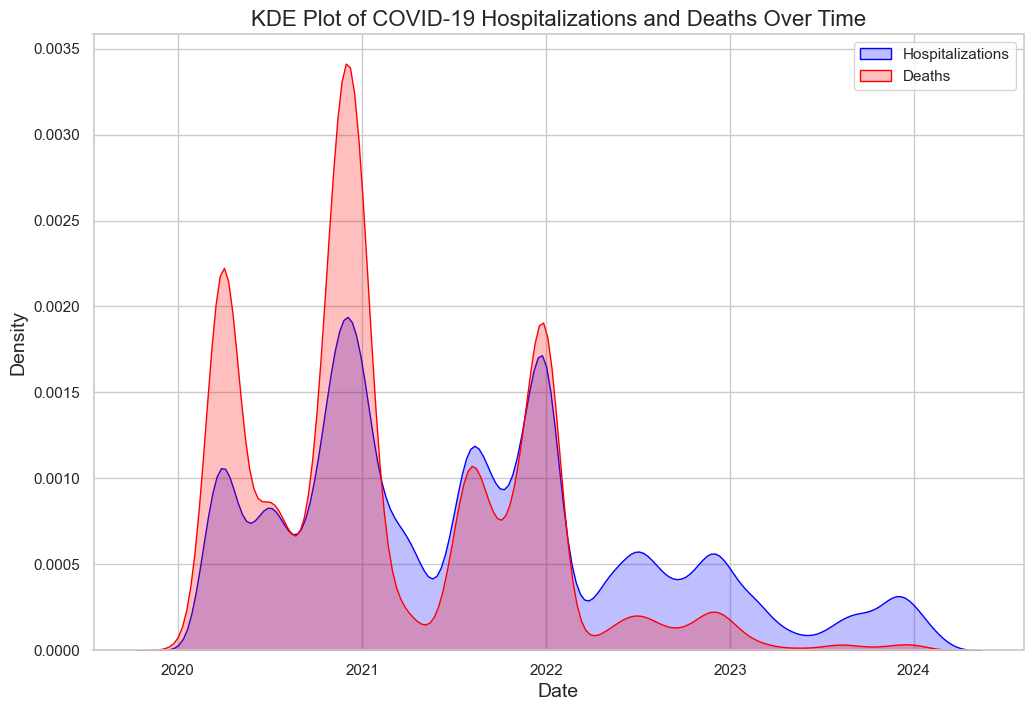

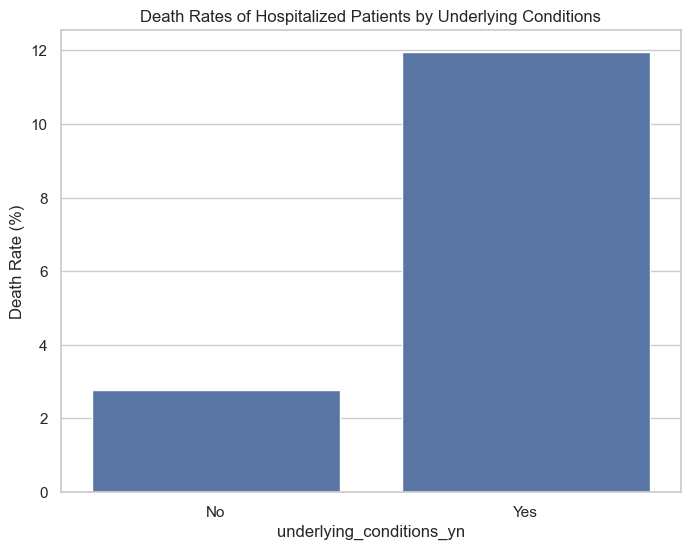

In [ ]:
covid_data['case_month'] = pd.to_datetime(covid_data['case_month'])
covid_data['month_year'] = covid_data['case_month'].dt.to_period('M').astype(str)
hospitalizations = covid_data[covid_data['hosp_yn'] == 'Yes']
deaths = covid_data[covid_data['death_yn'] == 'Yes']
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(12, 8))
sns.kdeplot(hospitalizations['case_month'], label='Hospitalizations', ax=ax, color='blue', fill=True)
sns.kdeplot(deaths['case_month'], label='Deaths', ax=ax, color='red', fill=True)
ax.set_title('KDE Plot of COVID-19 Hospitalizations and Deaths Over Time', fontsize=16)
ax.set_xlabel('Date', fontsize=14)
ax.set_ylabel('Density', fontsize=14)
ax.legend()
plt.show()


hospitalized_data = covid_data[covid_data['hosp_yn'] == 'Yes']

# Group data by underlying conditions and calculate death rates
underlying_conditions_stats = hospitalized_data.groupby('underlying_conditions_yn').agg(
    death_count=pd.NamedAgg(column='death_yn', aggfunc=lambda x: (x == 'Yes').sum()),
    total_count=pd.NamedAgg(column='death_yn', aggfunc='count')
).reset_index()

underlying_conditions_stats['death_rate'] = (underlying_conditions_stats['death_count'] / underlying_conditions_stats['total_count']) * 100

# Plotting
fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(data=underlying_conditions_stats, x='underlying_conditions_yn', y='death_rate', ax=ax)

ax.set_ylabel('Death Rate (%)')
ax.set_title('Death Rates of Hospitalized Patients by Underlying Conditions')

plt.show()

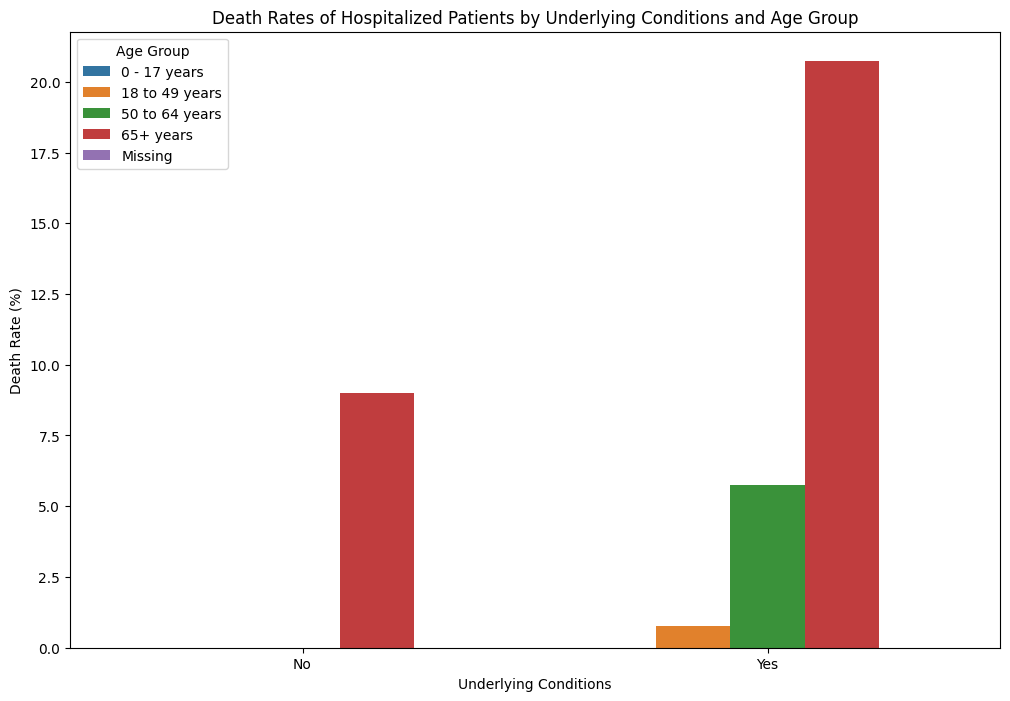

In [21]:
# Filter data for hospitalized patients
hospitalized_data = covid_data[covid_data['hosp_yn'] == 'Yes']

# Group data by underlying conditions and age group, and calculate death rates
stats = hospitalized_data.groupby(['underlying_conditions_yn', 'age_group']).agg(
    death_count=pd.NamedAgg(column='death_yn', aggfunc=lambda x: (x == 'Yes').sum()),
    total_count=pd.NamedAgg(column='death_yn', aggfunc='count')
).reset_index()

stats['death_rate'] = (stats['death_count'] / stats['total_count']) * 100

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))

# Plotting death rates by underlying conditions
sns.barplot(data=stats, x='underlying_conditions_yn', y='death_rate', hue='age_group', ax=ax)

ax.set_ylabel('Death Rate (%)')
ax.set_xlabel('Underlying Conditions')
ax.set_title('Death Rates of Hospitalized Patients by Underlying Conditions and Age Group')

plt.legend(title='Age Group')
plt.show()


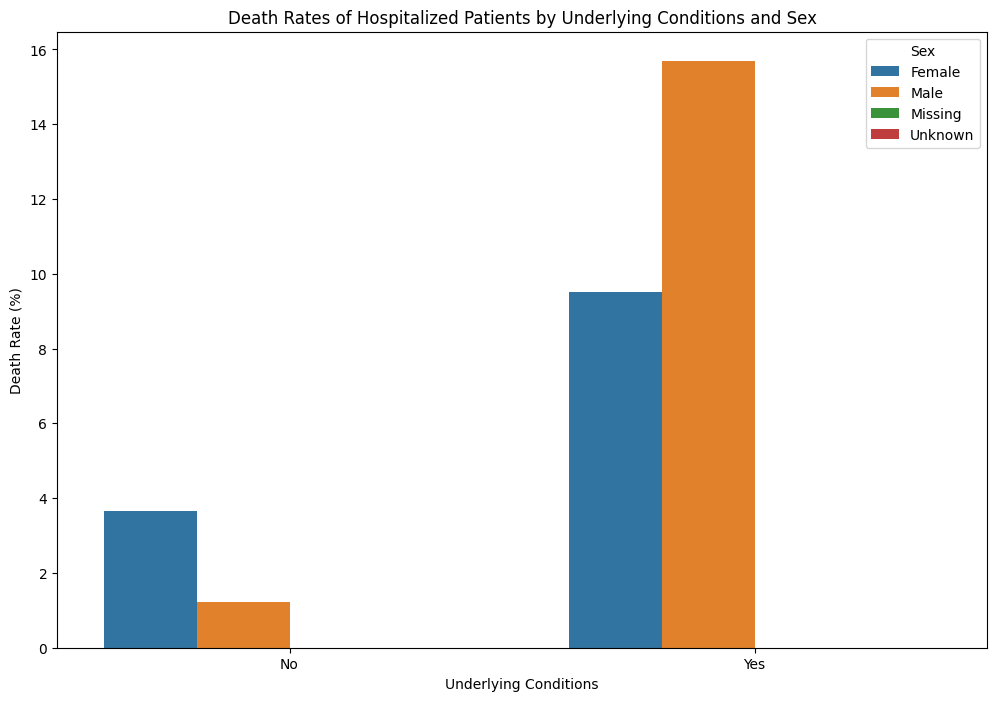

In [22]:
# Filter data for hospitalized patients
hospitalized_data = covid_data[covid_data['hosp_yn'] == 'Yes']

# Group data by underlying conditions and sex, and calculate death rates
stats = hospitalized_data.groupby(['underlying_conditions_yn', 'sex']).agg(
    death_count=pd.NamedAgg(column='death_yn', aggfunc=lambda x: (x == 'Yes').sum()),
    total_count=pd.NamedAgg(column='death_yn', aggfunc='count')
).reset_index()

stats['death_rate'] = (stats['death_count'] / stats['total_count']) * 100

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))

# Plotting death rates by underlying conditions and sex
sns.barplot(data=stats, x='underlying_conditions_yn', y='death_rate', hue='sex', ax=ax)

ax.set_ylabel('Death Rate (%)')
ax.set_xlabel('Underlying Conditions')
ax.set_title('Death Rates of Hospitalized Patients by Underlying Conditions and Sex')

plt.legend(title='Sex')
plt.show()


<h2>Are hospitalized patients with underlying medical conditions and/or risk
behaviors more likely to die from COVID-19?
</h2>
We can note that the peaks of the plot of hospitalized patients with confirmed underlying medical conditions are the same, or peak at the same time frame, as in the death rate distribution, especially between 2020 to 2021. Also we can note how significant the difference  is between the average death rate of hospitalized patients with underlying medical conditions and that of those who don’t. From this we can say yes, they are more likely to die from COVID-19.


<h2>Who are the people (the demographic segment) that appear to be most at
risk of death due to COVID-19? Who is the least at risk?</h2>

We are going first to cleanup data from any un-needed entries
For this we are going to use stacked plots

In [11]:
df = pd.read_csv("/Users/mohamedghaith/Documents/Uni/Stat/Project/data.csv", 
                usecols=["age_group", "death_yn", "sex", "race", "case_month"],
                dtype={"age_group": "category", "death_yn": "category",
                        "sex": "category", "race":"category", "case_month": "category"})

df = df[(df["death_yn"] != "Unknown") & (df["death_yn"] != "Missing")]
df = df[(df["sex"] != "Unknown") & (df["sex"] != "Missing") & (df["sex"] != "Other")]
df = df[(df["race"] != "Unknown") & (df["race"] != "Missing")]
df = df[(df["age_group"] != "Unknown") & (df["age_group"] != "Missing")]
df = df[(df["case_month"] != "Unknown") & (df["case_month"] != "Missing")]
df["sex"] = df["sex"].cat.remove_unused_categories()
df["race"] = df["race"].cat.remove_unused_categories()
df["age_group"] = df["age_group"].cat.remove_unused_categories()
df["death_yn"] = df["death_yn"].cat.remove_unused_categories()
df["case_month"] = df["case_month"].cat.remove_unused_categories()


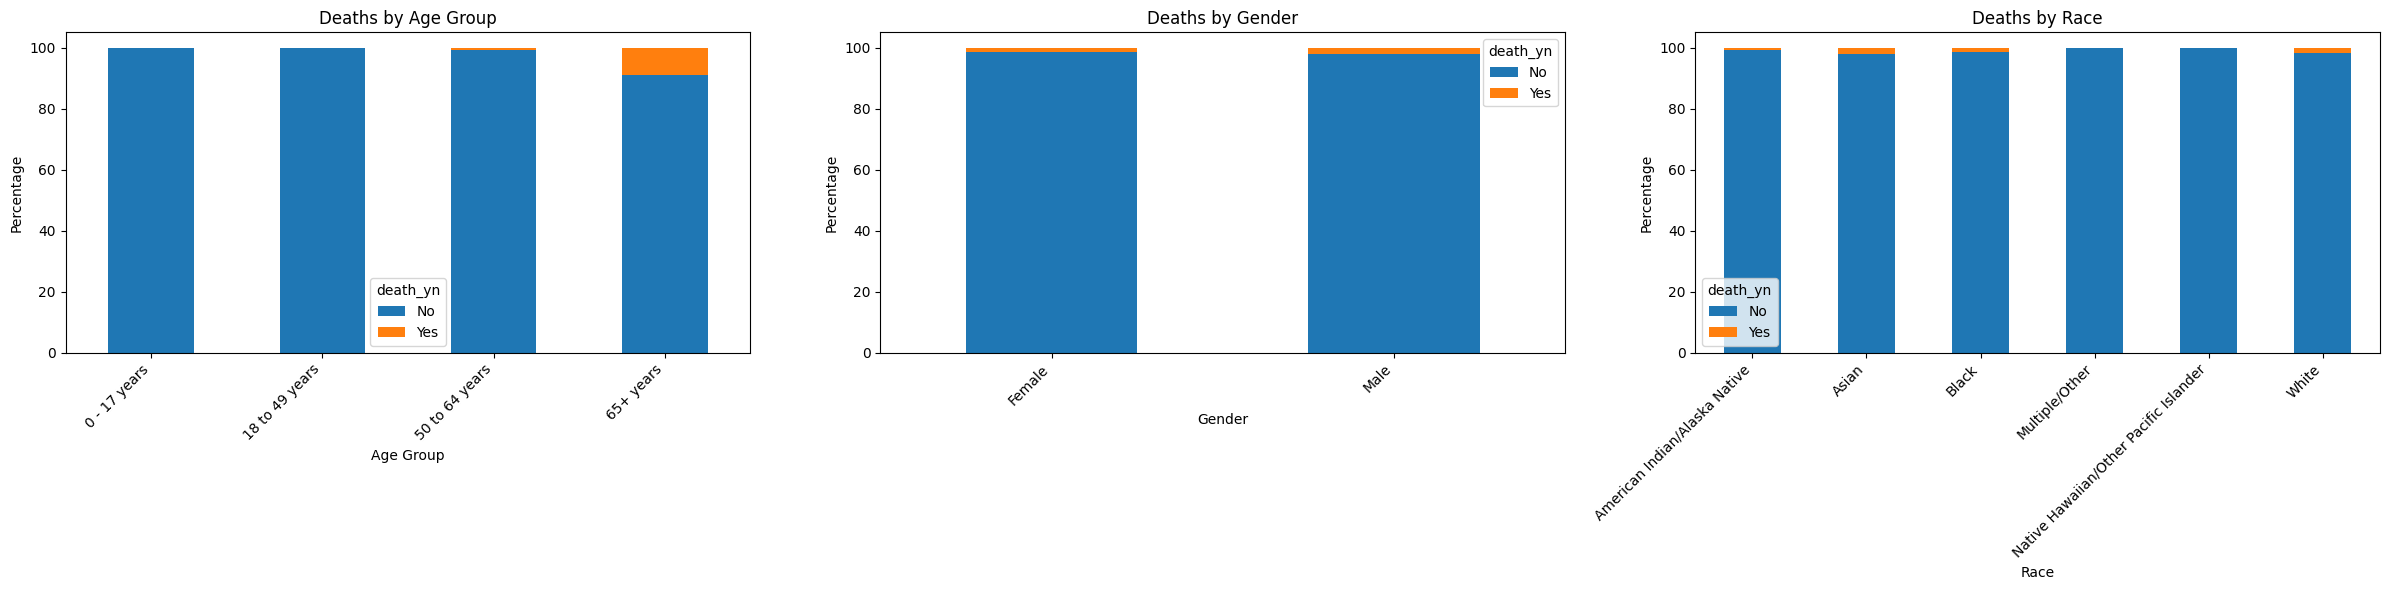

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Calculate the percentage for each combination
df_grouped_age = df.groupby(['age_group', 'death_yn']).size().unstack(fill_value=0)
df_grouped_age = df_grouped_age.div(df_grouped_age.sum(axis=1), axis=0) * 100

df_grouped_sex = df.groupby(['sex', 'death_yn']).size().unstack(fill_value=0)
df_grouped_sex = df_grouped_sex.div(df_grouped_sex.sum(axis=1), axis=0) * 100

df_grouped_race = df.groupby(['race', 'death_yn']).size().unstack(fill_value=0)
df_grouped_race = df_grouped_race.div(df_grouped_race.sum(axis=1), axis=0) * 100

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(24, 6))

# Plot 1: Deaths by Age Group
age_group_plot = df_grouped_age.plot(kind='bar', stacked=True, ax=axes[0], color=['#1f77b4', '#ff7f0e'])
axes[0].set_title('Deaths by Age Group')
axes[0].set_xlabel('Age Group')
axes[0].set_ylabel('Percentage')
age_group_plot.set_xticklabels(age_group_plot.get_xticklabels(), rotation=45, ha='right')

# Plot 2: Deaths by Gender
gender_plot = df_grouped_sex.plot(kind='bar', stacked=True, ax=axes[1], color=['#1f77b4', '#ff7f0e'])
axes[1].set_title('Deaths by Gender')
axes[1].set_xlabel('Gender')
axes[1].set_ylabel('Percentage')
gender_plot.set_xticklabels(gender_plot.get_xticklabels(), rotation=45, ha='right')

# Plot 3: Deaths by Race
race_plot = df_grouped_race.plot(kind='bar', stacked=True, ax=axes[2], color=['#1f77b4', '#ff7f0e'])
axes[2].set_title('Deaths by Race')
axes[2].set_xlabel('Race')
axes[2].set_ylabel('Percentage')
race_plot.set_xticklabels(race_plot.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()


<mark><b>From the stacked barplot for each specified demogarphic category We can note the following:</b></mark>
![image.png](attachment:image.png)
- Patients from age group 65+ years are more likely to die from covid relative to other age groups, 18-40 are less likely(lower death rate)
- Male patients are more likely to die from covid where females had less death rate 
- For race, we can note white have higher death rates

<h2>What percent of patients who have reported exposure to any kind of travel /
or congregation within the 14 days prior to illness onset end up hospitalized?
What percent of those go on to be hospitalized?</h2>

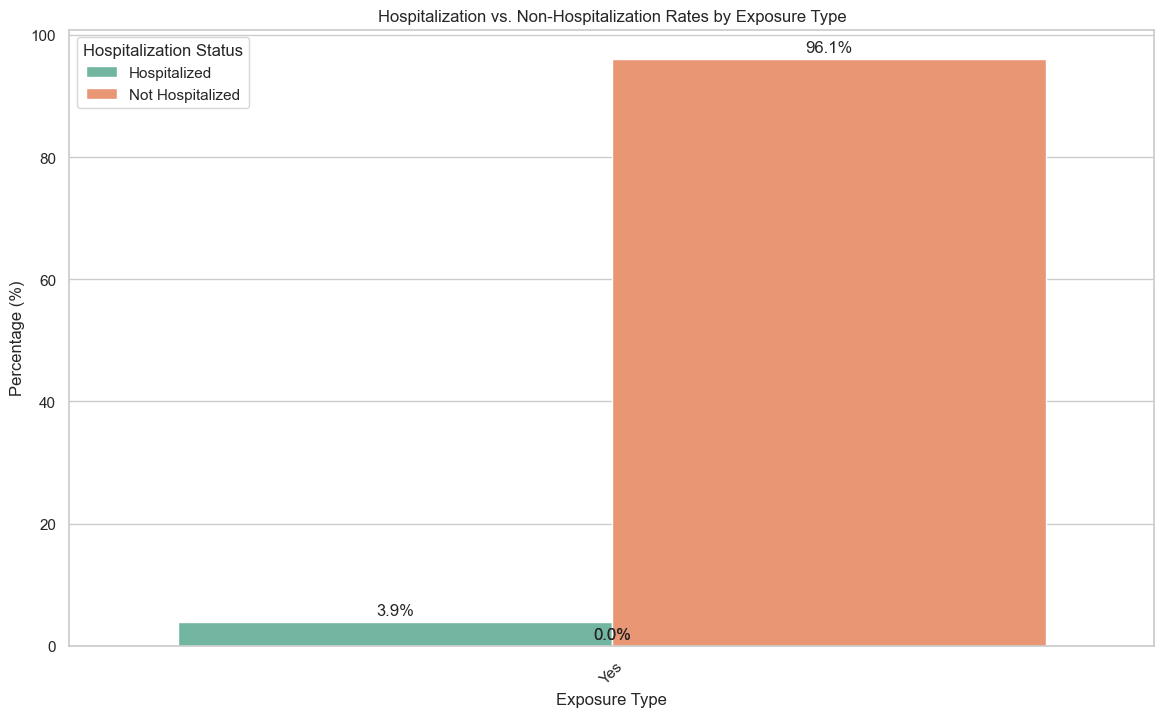

In [ ]:
filtered_data = covid_data[~covid_data['exposure_yn'].isin(['Unknown', 'Missing'])]

exposure_hospitalization_stats = filtered_data.groupby('exposure_yn').agg(
    hosp_count=pd.NamedAgg(column='hosp_yn', aggfunc=lambda x: (x == 'Yes').sum()),
    total_count=pd.NamedAgg(column='exposure_yn', aggfunc='count')
).reset_index()

exposure_hospitalization_stats['hosp_rate'] = (exposure_hospitalization_stats['hosp_count'] / exposure_hospitalization_stats['total_count']) * 100
exposure_hospitalization_stats['non_hosp_rate'] = 100 - exposure_hospitalization_stats['hosp_rate']

stacked_data = exposure_hospitalization_stats.melt(id_vars='exposure_yn', value_vars=['hosp_rate', 'non_hosp_rate'], var_name='Hospitalization Status', value_name='Percentage')

stacked_data['Hospitalization Status'] = stacked_data['Hospitalization Status'].map({'hosp_rate': 'Hospitalized', 'non_hosp_rate': 'Not Hospitalized'})

fig, ax = plt.subplots(figsize=(14, 8))
sns.barplot(data=stacked_data, x='exposure_yn', y='Percentage', hue='Hospitalization Status', ax=ax, palette='Set2')

for p in ax.patches:
    percentage = f'{p.get_height():.2f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center', xytext=(0, 8), textcoords='offset points')
    
ax.set_ylabel('Percentage (%)')
ax.set_xlabel('Exposure Type')
ax.set_title('Hospitalization vs. Non-Hospitalization Rates by Exposure Type')
plt.xticks(rotation=45)
plt.legend(title='Hospitalization Status')
plt.show()




<b> We can note that about 4% of those who reported travel 14-days prior to their illness end up hospitalized</b>

![image.png](attachment:image.png)

In [ ]:
# Filter data
asymptomatic_data = covid_data[(covid_data['symptom_status'] == 'Asymptomatic') & (~covid_data['symptom_status'].isin(['Unknown', 'Missing']))]
symptomatic_data = covid_data[(covid_data['symptom_status'] == 'Symptomatic') & (~covid_data['symptom_status'].isin(['Unknown', 'Missing']))]

# Calculate hospitalization and death rates for asymptomatic patients
asymptomatic_hospitalization_rate = (asymptomatic_data['hosp_yn'] == 'Yes').mean() * 100
asymptomatic_death_rate = (asymptomatic_data['death_yn'] == 'Yes').mean() * 100

# Calculate hospitalization and death rates for symptomatic patients
symptomatic_hospitalization_rate = (symptomatic_data['hosp_yn'] == 'Yes').mean() * 100
symptomatic_death_rate = (symptomatic_data['death_yn'] == 'Yes').mean() * 100

print("Hospitalization and Death Rates:")
print(f"Asymptomatic Patients - Hospitalization Rate: {asymptomatic_hospitalization_rate:.2f}%, Death Rate: {asymptomatic_death_rate:.2f}%")
print(f"Symptomatic Patients - Hospitalization Rate: {symptomatic_hospitalization_rate:.2f}%, Death Rate: {symptomatic_death_rate:.2f}%")


Hospitalization and Death Rates:
Asymptomatic Patients - Hospitalization Rate: 3.15%, Death Rate: 0.37%
Symptomatic Patients - Hospitalization Rate: 4.83%, Death Rate: 0.52%


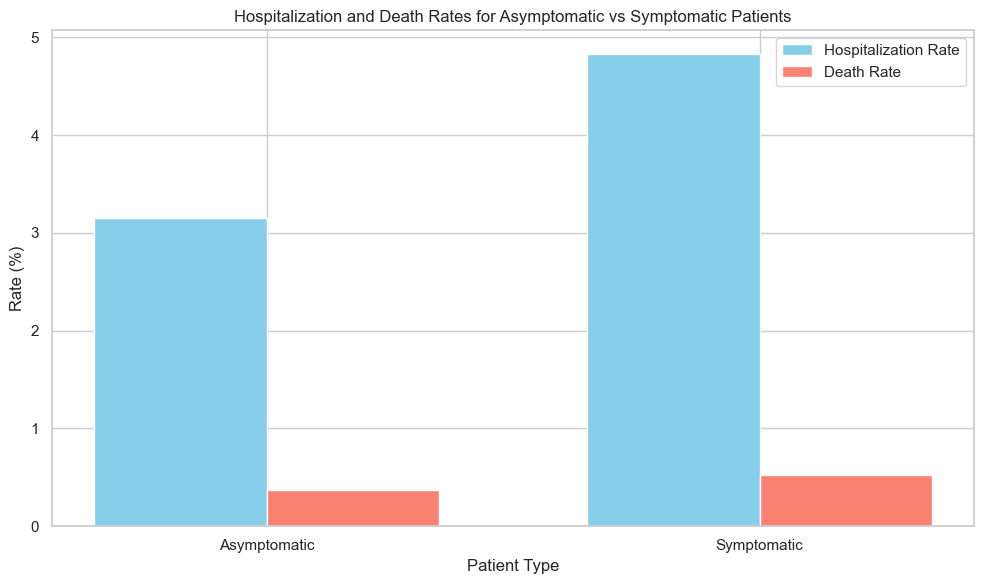

In [ ]:
plt.figure(figsize=(10, 6))

bar_width = 0.35
index = [1, 2]

# Define data
hospitalization_rates = [asymptomatic_hospitalization_rate, symptomatic_hospitalization_rate]
death_rates = [asymptomatic_death_rate, symptomatic_death_rate]

# Plot hospitalization rates
plt.bar(index, hospitalization_rates, bar_width, label='Hospitalization Rate', color='skyblue')

# Plot death rates
plt.bar([i + bar_width for i in index], death_rates, bar_width, label='Death Rate', color='salmon')

plt.xlabel('Patient Type')
plt.ylabel('Rate (%)')
plt.title('Hospitalization and Death Rates for Asymptomatic vs Symptomatic Patients')
plt.xticks([i + bar_width / 2 for i in index], ['Asymptomatic', 'Symptomatic'])
plt.legend()

plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

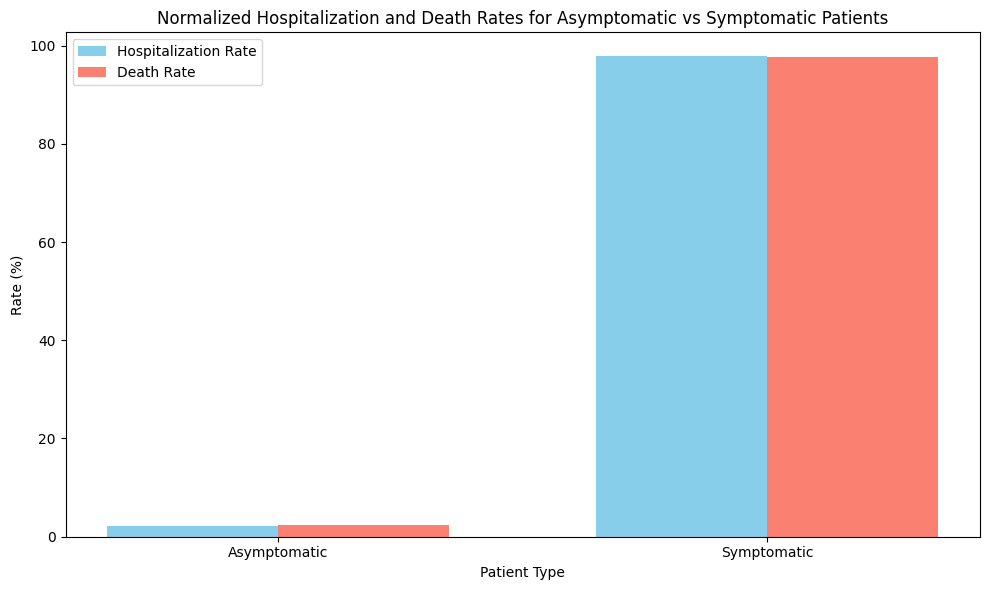

In [26]:
#Normalization:

plt.figure(figsize=(10, 6))

bar_width = 0.35
index = [1, 2]

asymptomatic_data = covid_data[covid_data['symptom_status'] == 'Asymptomatic']
symptomatic_data = covid_data[covid_data['symptom_status'] == 'Symptomatic']

# Count hospitalization and death for asymptomatic patients
asymptomatic_hospitalization_count = (asymptomatic_data['hosp_yn'] == 'Yes').sum()
asymptomatic_no_hospitalization_count = (asymptomatic_data['hosp_yn'] == 'No').sum()
asymptomatic_death_count = (asymptomatic_data['death_yn'] == 'Yes').sum()

# Count hospitalization and death for symptomatic patients
symptomatic_hospitalization_count = (symptomatic_data['hosp_yn'] == 'Yes').sum()
symptomatic_no_hospitalization_count = (symptomatic_data['hosp_yn'] == 'No').sum()
symptomatic_death_count = (symptomatic_data['death_yn'] == 'Yes').sum()
total_hospitalized_count = (asymptomatic_hospitalization_count + symptomatic_hospitalization_count)

plt.figure(figsize=(10, 6))

bar_width = 0.35
index = [1, 2]

# Define data
total_death_count = (asymptomatic_death_count + symptomatic_death_count)

hospitalization_rates = [(asymptomatic_hospitalization_count / total_hospitalized_count) * 100,
                         (symptomatic_hospitalization_count / total_hospitalized_count) * 100]

death_rates = [(asymptomatic_death_count / total_death_count) * 100,
               (symptomatic_death_count / total_death_count) * 100]

# Plot hospitalization rates
plt.bar(index, hospitalization_rates, bar_width, label='Hospitalization Rate', color='skyblue')

# Plot death rates
plt.bar([i + bar_width for i in index], death_rates, bar_width, label='Death Rate', color='salmon')

plt.xlabel('Patient Type')
plt.ylabel('Rate (%)')
plt.title('Normalized Hospitalization and Death Rates for Asymptomatic vs Symptomatic Patients')
plt.xticks([i + bar_width / 2 for i in index], ['Asymptomatic', 'Symptomatic'])
plt.legend()

plt.tight_layout()
plt.show()




From the analysis, we can see that the hospitalization and death rates for asymptomatic patients are lower than those for symptomatic patients. This suggests that asymptomatic patients may have a milder form of the disease compared to symptomatic patients.

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the survey data containing information about how EIPs were used by state
df = pd.read_csv('pulse_puf_most_recent.csv', usecols=['est_st', 'eip'], dtype={'est_st': 'str', 'eip': 'category'})





In [ ]:
print(df.info())
print(df.shape)
print("Categories for 'expctloss':", df["eip"].cat.categories)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1088314 entries, 0 to 1088313
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype   
---  ------  --------------    -----   
 0   est_st  1088314 non-null  object  
 1   eip     549361 non-null   category
dtypes: category(1), object(1)
memory usage: 9.3+ MB
None
(1088314, 2)
Categories for 'expctloss': Index(['-99', '1', '2', '3', '4'], dtype='object')


In [ ]:
survey_data = df

In [ ]:

import pandas as pd
import plotly.express as px

filtered_data = survey_data[~survey_data['eip'].isin([-88, -99, 4])]
state_counts = survey_data.groupby('state')['eip'].count()
eip_counts = filtered_data.groupby('state')['eip'].count()

data = {
    'state': survey_data['state'].unique(),
    'eip_counts': eip_counts,
    'state_counts': state_counts
}
survey_data = pd.DataFrame(data)

# Calculating the percentage of EIP recipients for each state
survey_data['eip_percentage'] = (survey_data['eip_counts'] / survey_data['state_counts']) * 100

# Create a choropleth map
fig = px.choropleth(
    survey_data,
    locations='state', 
    locationmode='USA-states', 
    color='eip_percentage',
    hover_name='state',
    hover_data=['eip_percentage'],
    color_continuous_scale='Blues',
    scope='usa',
    labels={'eip_percentage': 'EIP Percentage'}
)

fig.update_layout(
    title_text='Percentage of EIP Recipients by State',
    geo=dict(
        lakecolor='rgb(255, 255, 255)'
    )
)

fig.show()



state_percentages = (eip_counts / state_counts)*100
# print(state_percentages)

highest_percentage_state = state_percentages.idxmax(-1)
highest_percentage = state_percentages.max()

print(f"The state with the highest percentage of EIP recipients is {highest_percentage_state} "
      f"with {highest_percentage:.2f}% ")





The state with the highest percentage of EIP recipients is WV with 88.42% 


<h2>2.2.1 What is the relationship between age group and ICU admission rates?</h2>

In [28]:
df = pd.read_csv("/Users/mohamedghaith/Documents/Uni/Stat/Project/data.csv", 
                usecols=["age_group","case_month","icu_yn"],
                dtype={"age_group": "category", "icu_yn": "category", "case_month": "category"})

df = df[(df["icu_yn"] != "Unknown") & (df["icu_yn"] != "Missing")]
df = df[(df["age_group"] != "Unknown") & (df["age_group"] != "Missing")]
df = df[(df["case_month"] != "Unknown") & (df["case_month"] != "Missing")]
df["age_group"] = df["age_group"].cat.remove_unused_categories()
df["icu_yn"] = df["icu_yn"].cat.remove_unused_categories()
df["case_month"] = df["case_month"].cat.remove_unused_categories()

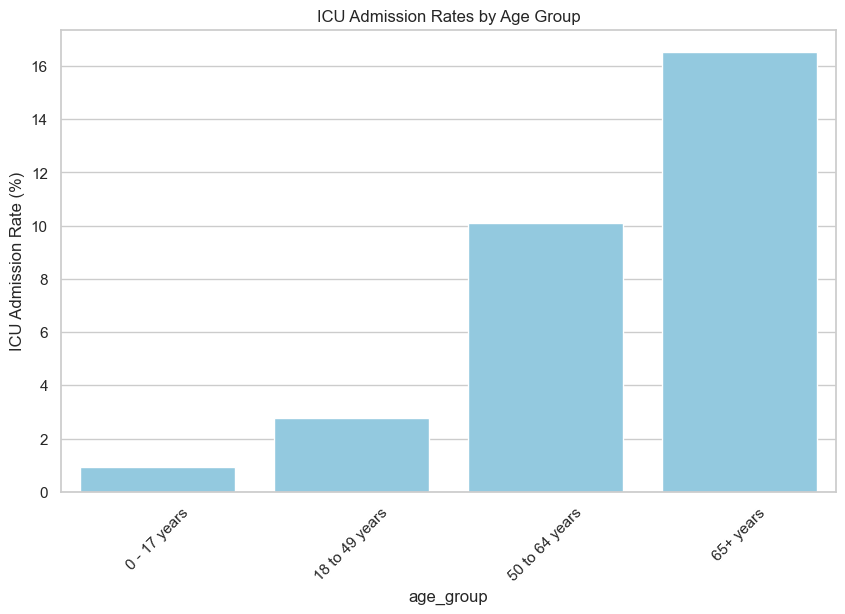

In [ ]:
# Group data by age group and calculate ICU admission rates
icu_stats = df.groupby('age_group').agg(
    icu_count=pd.NamedAgg(column='icu_yn', aggfunc=lambda x: (x == 'Yes').sum()),
    total_count=pd.NamedAgg(column='age_group', aggfunc='count')
).reset_index()

icu_stats['icu_rate'] = (icu_stats['icu_count'] / icu_stats['total_count']) * 100

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(data=icu_stats, x='age_group', y='icu_rate', ax=ax, color='skyblue')

ax.set_ylabel('ICU Admission Rate (%)')
ax.set_title('ICU Admission Rates by Age Group')
race_plot = sns.histplot(common_norm=False,data=df, y="age_group", hue="icu_yn", multiple="dodge",
                         shrink=.8, stat='percent', palette="Set2", ax=axes[2], legend=False)
plt.xticks(rotation=45)
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


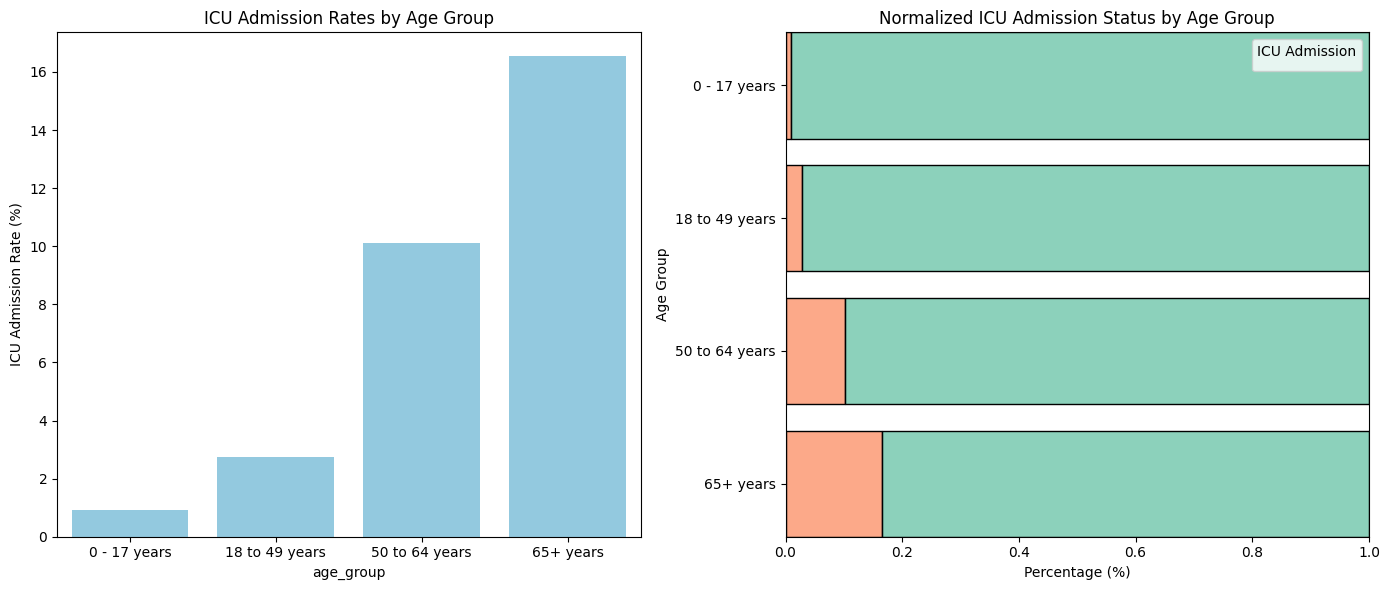

In [30]:

# Group data by age group and calculate ICU admission rates
icu_stats = df.groupby('age_group').agg(
    icu_count=pd.NamedAgg(column='icu_yn', aggfunc=lambda x: (x == 'Yes').sum()),
    total_count=pd.NamedAgg(column='age_group', aggfunc='count')
).reset_index()

icu_stats['icu_rate'] = (icu_stats['icu_count'] / icu_stats['total_count']) * 100

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot 1: Bar plot for ICU Admission Rates by Age Group
sns.barplot(data=icu_stats, x='age_group', y='icu_rate', ax=axes[0], color='skyblue')
axes[0].set_ylabel('ICU Admission Rate (%)')
axes[0].set_title('ICU Admission Rates by Age Group')

# Plot 2: Stacked bar plot for ICU Admission by Age Group and ICU Status
sns.histplot(data=df, y="age_group", hue="icu_yn", multiple="fill", shrink=.8, stat='percent', palette="Set2", ax=axes[1])
axes[1].set_ylabel('Age Group')
axes[1].set_xlabel('Percentage (%)')
axes[1].set_title('Normalized ICU Admission Status by Age Group')
axes[1].legend(title='ICU Admission')

plt.tight_layout()
plt.show()


We can note a general trend with higher icu addmision rate increasing as we go from higher age group to lower

- <h2>2.2.2 How does symptom status impact the rate of icu admmitance</h2>


In [ ]:
# Filter data
asymptomatic_data = covid_data[(covid_data['symptom_status'] == 'Asymptomatic') & (~covid_data['symptom_status'].isin(['Unknown', 'Missing']))]
symptomatic_data = covid_data[(covid_data['symptom_status'] == 'Symptomatic') & (~covid_data['symptom_status'].isin(['Unknown', 'Missing']))]

# Calculate hospitalization and death rates for asymptomatic patients
asymptomatic_icu_rate = (asymptomatic_data['icu_yn'] == 'Yes').mean() * 100

# Calculate hospitalization and death rates for symptomatic patients
symptomatic_icu_rate = (symptomatic_data['icu_yn'] == 'Yes').mean() * 100
print("Hospitalization and Death Rates:")
print(f"Asymptomatic Patients - Hospitalization Rate: {asymptomatic_icu_rate:.2f}% ")
print(f"Symptomatic Patients - Hospitalization Rate: {symptomatic_icu_rate:.2f}%")


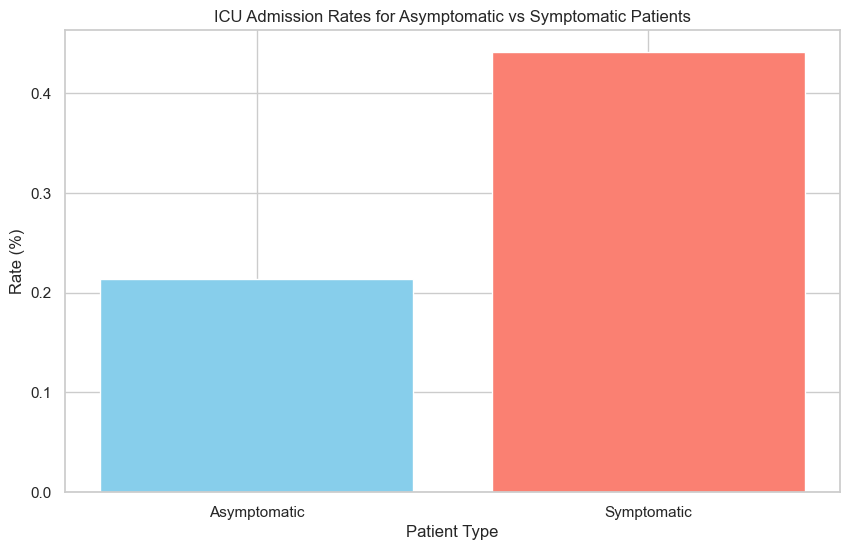

In [ ]:
#plot rates of icu admission for symptomatic and asymptomatic patients
plt.figure(figsize=(10, 6))
plt.bar(["Asymptomatic", "Symptomatic"], [asymptomatic_icu_rate, symptomatic_icu_rate], color=['skyblue', 'salmon'])
plt.xlabel('Patient Type')
plt.ylabel('Rate (%)')
plt.title('ICU Admission Rates for Asymptomatic vs Symptomatic Patients')
plt.show()


<h4>We can note a much greater icu addmision rate for Symptomatic patients. This tells that they have much highe probability to suffer from severe covid symptoms</h4>

<h2>2.2.3 How does the length of time between symptom onset and first positive test correlate with hospitalization rates?</h2>

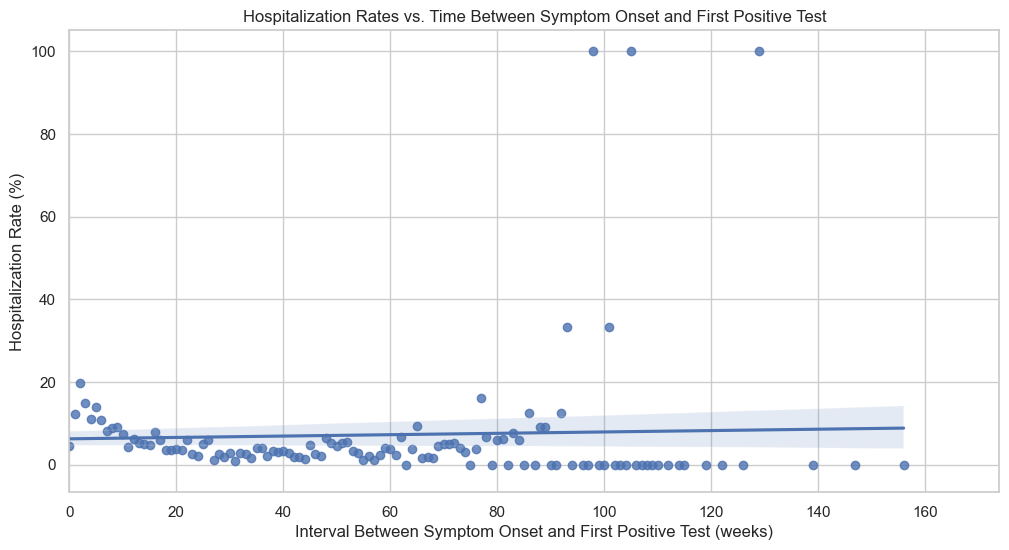

In [ ]:
# Calculate hospitalization rates based on the time between symptom onset and first positive test
interval_stats = covid_data.groupby('case_onset_interval').agg(
    hosp_count=pd.NamedAgg(column='hosp_yn', aggfunc=lambda x: (x == 'Yes').sum()),
    total_count=pd.NamedAgg(column='hosp_yn', aggfunc='count')
).reset_index()

interval_stats['hosp_rate'] = (interval_stats['hosp_count'] / interval_stats['total_count']) * 100

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))
sns.regplot(data=interval_stats, x='case_onset_interval', y='hosp_rate', ax=ax)

ax.set_xlabel('Interval Between Symptom Onset and First Positive Test (weeks)')
ax.set_ylabel('Hospitalization Rate (%)')
ax.set_title('Hospitalization Rates vs. Time Between Symptom Onset and First Positive Test')
x_min, x_max = ax.get_xlim()
ax.set_xlim(0, x_max)
plt.show()


We can note that longer intervals between symptom onset and first positive test are related to higher hospitalization rates. Early testing and diagnosis might help reduce severe outcomes.

<h2>2.2.4 What is the rate of patients who are dead after icu admmission</h2>

In [ ]:
df = pd.read_csv("/Users/mohamedghaith/Documents/Uni/Stat/Project/data.csv", 
                usecols=["death_yn","case_month","icu_yn"],
                dtype={"death_yn": "category", "icu_yn": "category", "case_month": "category"})

df = df[(df["icu_yn"] != "Unknown") & (df["icu_yn"] != "Missing")]
df = df[(df["death_yn"] != "Unknown") & (df["death_yn"] != "Missing")]
df = df[(df["case_month"] != "Unknown") & (df["case_month"] != "Missing")]
df["death_yn"] = df["death_yn"].cat.remove_unused_categories()
df["icu_yn"] = df["icu_yn"].cat.remove_unused_categories()
df["case_month"] = df["case_month"].cat.remove_unused_categories()

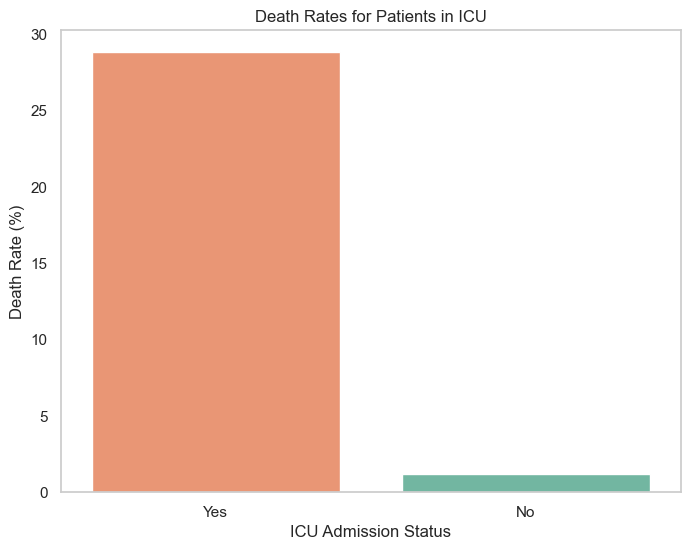

In [ ]:
#plottting death rates for patients in icu
icu_death_stats = df.groupby('icu_yn').agg(
    death_count=pd.NamedAgg(column='death_yn', aggfunc=lambda x: (x == 'Yes').sum()),
    total_count=pd.NamedAgg(column='icu_yn', aggfunc='count')
).reset_index()

icu_death_stats['death_rate'] = (icu_death_stats['death_count'] / icu_death_stats['total_count']) * 100

fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(data=icu_death_stats, x='icu_yn', y='death_rate', ax=ax, palette='Set2', dodge=False, order=['Yes', 'No'], hue='icu_yn', )
plt.title('Death Rates for Patients in ICU')
plt.ylabel('Death Rate (%)')
plt.xlabel('ICU Admission Status')
plt.grid(False)
plt.show()


<h4>We can note that confirmed death percentage for patients who were admitted to the icu is much higher than those who didn't. We can deduce that patients enter the icu at a very severe condition and should be reported earlier</h4>

<h2>2.2.5 What is the impact of symptom onset interval on death rates?</h2>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Filter out missing or unknown values if necessary
filtered_data = covid_data[~covid_data['case_onset_interval'].isin(['Unknown', 'Missing'])]

# Group data by symptom onset interval and calculate death rates
onset_interval_stats = filtered_data.groupby('case_onset_interval').agg(
    death_count=pd.NamedAgg(column='death_yn', aggfunc=lambda x: (x == 'Yes').sum()),
    total_count=pd.NamedAgg(column='death_yn', aggfunc='count')
).reset_index()

# Calculate the death rate
onset_interval_stats['death_rate'] = (onset_interval_stats['death_count'] / onset_interval_stats['total_count']) * 100

# Sorting the data by onset interval for better visualization
onset_interval_stats = onset_interval_stats.sort_values(by='case_onset_interval')


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

# Assuming covid_data is your DataFrame and already loaded
# Replace this with your actual data loading code

# Filter out missing or unknown values if necessary
filtered_data = covid_data[~covid_data['case_onset_interval'].isin(['Unknown', 'Missing'])]

import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import statsmodels.api as sm

# Assuming covid_data is your DataFrame and already loaded
# Replace this with your actual data loading code

# Filter out missing or unknown values if necessary
filtered_data = covid_data[~covid_data['case_onset_interval'].isin(['Unknown', 'Missing'])]

# Group data by symptom onset interval and calculate death rates
onset_interval_stats = filtered_data.groupby('case_onset_interval').agg(
    death_count=pd.NamedAgg(column='death_yn', aggfunc=lambda x: (x == 'Yes').sum()),
    total_count=pd.NamedAgg(column='death_yn', aggfunc='count')
).reset_index()



In [ ]:

onset_interval_stats['death_rate'] = (onset_interval_stats['death_count'] / onset_interval_stats['total_count']) * 100


onset_interval_stats = onset_interval_stats.sort_values(by='case_onset_interval')


fig = px.scatter(onset_interval_stats, x='case_onset_interval', y='death_rate', title='Death Rates by Symptom Onset Interval',
                 labels={'case_onset_interval': 'Weeks Between Symptom Onset and First Positive Test', 'death_rate': 'Death Rate (%)'},
                 trendline='ols', trendline_color_override='red')

fig.update_traces(marker=dict(size=12, opacity=0.8, line=dict(width=2, color='DarkSlateGrey')))
fig.update_layout(showlegend=False)

fig.show()

<h4>We can note no difference significant change or upgoing trendline for the death rate 
along with number of Weeks Between Symptom Onset and First Positive Tes </h4>

# Question 3:

## Hypothesis testing

# Part 1

### Collecting the data

In [ ]:
df = pd.read_csv("../Datasets/DS-2/data.csv", 
                usecols=["age_group", "sex", "race", "death_yn"],
                 dtype={"age_group": "category", "sex": "category", "race": "category", "death_yn":"category"})


In [ ]:
df.info()
print("Categories for 'age_group':", df["age_group"].cat.categories)
print("Categories for 'sex':", df["sex"].cat.categories)
print("Categories for 'race':", df["race"].cat.categories)
print("Categories for 'death_yn':", df["death_yn"].cat.categories)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19020962 entries, 0 to 19020961
Data columns (total 4 columns):
 #   Column     Dtype   
---  ------     -----   
 0   age_group  category
 1   sex        category
 2   race       category
 3   death_yn   category
dtypes: category(4)
memory usage: 72.6 MB
Categories for 'age_group': Index(['0 - 17 years', '18 to 49 years', '50 to 64 years', '65+ years',
       'Missing'],
      dtype='object')
Categories for 'sex': Index(['Female', 'Male', 'Missing', 'Unknown', 'Other'], dtype='object')
Categories for 'race': Index(['American Indian/Alaska Native', 'Asian', 'Black', 'Missing',
       'Multiple/Other', 'Native Hawaiian/Other Pacific Islander', 'Unknown',
       'White'],
      dtype='object')
Categories for 'death_yn': Index(['Missing', 'No', 'Unknown', 'Yes'], dtype='object')


### Data Cleaning

In [ ]:
df = df[(df["age_group"] != "Unknown") & (df["age_group"] != "Missing") & (df["age_group"] != "NA")]
df = df[(df["sex"] != "Missing") & (df["sex"] != "Unknown")]
df = df[(df["race"] != "Missing") & (df["race"] != "Unknown")]
df = df[(df["death_yn"] != "Missing") & (df["death_yn"] != "Unknown")]

df["age_group"] = df["age_group"].cat.remove_unused_categories()
df["sex"] = df["sex"].cat.remove_unused_categories()
df["race"] = df["race"].cat.remove_unused_categories()
df["death_yn"] = df["death_yn"].cat.remove_unused_categories()

df.reset_index(drop=True, inplace=True)

display(df.head())
display(df.info())

age_group     sex   race death_yn
0       65+ years  Female  White       No
1  18 to 49 years  Female  Black       No
2  18 to 49 years  Female  White       No
3  50 to 64 years  Female  White       No
4    0 - 17 years    Male  White       No

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5525223 entries, 0 to 5525222
Data columns (total 4 columns):
 #   Column     Dtype   
---  ------     -----   
 0   age_group  category
 1   sex        category
 2   race       category
 3   death_yn   category
dtypes: category(4)
memory usage: 21.1 MB


None

# Test: Chi-Square Test
## The Chi-square test is typically used to determine if there is a signifcant association betweem categorical data.

## 1- Age Group and Death Rate
### Hypothesis statments:
#### Ho: there is no association between age and death rate for COVID-19 patients
#### Ha: there is an association between age and death rate for COVID-19 patients



### Plotting Data

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a nice style and context
sns.set(style="whitegrid", context="talk")

plt.figure(figsize=(12, 8))

# Create the countplot
ax = sns.countplot(data=df, x='age_group', hue='death_yn', palette="Set2")

# Add numbers to each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5), 
                textcoords='offset points')

# Customize labels and title
plt.title('Death Status by Age Group', fontsize=18, weight='bold')
plt.xlabel('Age Group', fontsize=14, weight='bold')
plt.ylabel('Number of Patients', fontsize=14, weight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Customize the legend
plt.legend(title='Death Status', title_fontsize='13', fontsize='12', loc='upper right')

# Show the plot
plt.tight_layout()
plt.show()


### Contingency Table

In [ ]:
# Create a contingency table
contingency_table3_1 = pd.crosstab(df['age_group'], df['death_yn'])

print(contingency_table3_1)


death_yn             No    Yes
age_group                     
0 - 17 years     825619      0
18 to 49 years  2379165   1388
50 to 64 years   906248   7428
65+ years        707193  70562


### Chi-Square Test Results

In [ ]:
from scipy.stats import chi2_contingency

# Perform the Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency_table3_1)
print(f"\nChi2: {chi2}")
print(f"p-value: {p}")
print(f"Degrees of freedom: {dof}")
print("\nExpected frequencies:")
print(expected)
if p < 0.005:
    
    print("\nThe p-value is less than 0.005. There is significant association found between age and death from COVID-19.")

else:
    print("\nThe p-value is greater than or equal to 0.005. No significant association was found.")


Chi2: 324646.1892193214
p-value: 0.0
Degrees of freedom: 3

Expected frequencies:
[[ 812237.76330482   13381.23669518]
 [2341970.13894858   38582.86105142]
 [ 898867.57769056   14808.42230944]
 [ 765149.52005604   12605.47994396]]

The p-value is less than 0.005. There is significant association found between age and death from COVID-19.


## 2- Sex and Death Rate
### Hypothesis statments:
#### Ho: there is no association between sex and death rate for COVID-19 patients
#### Ha: there is an association between sex and death rate for COVID-19 patients



### Plotting Data

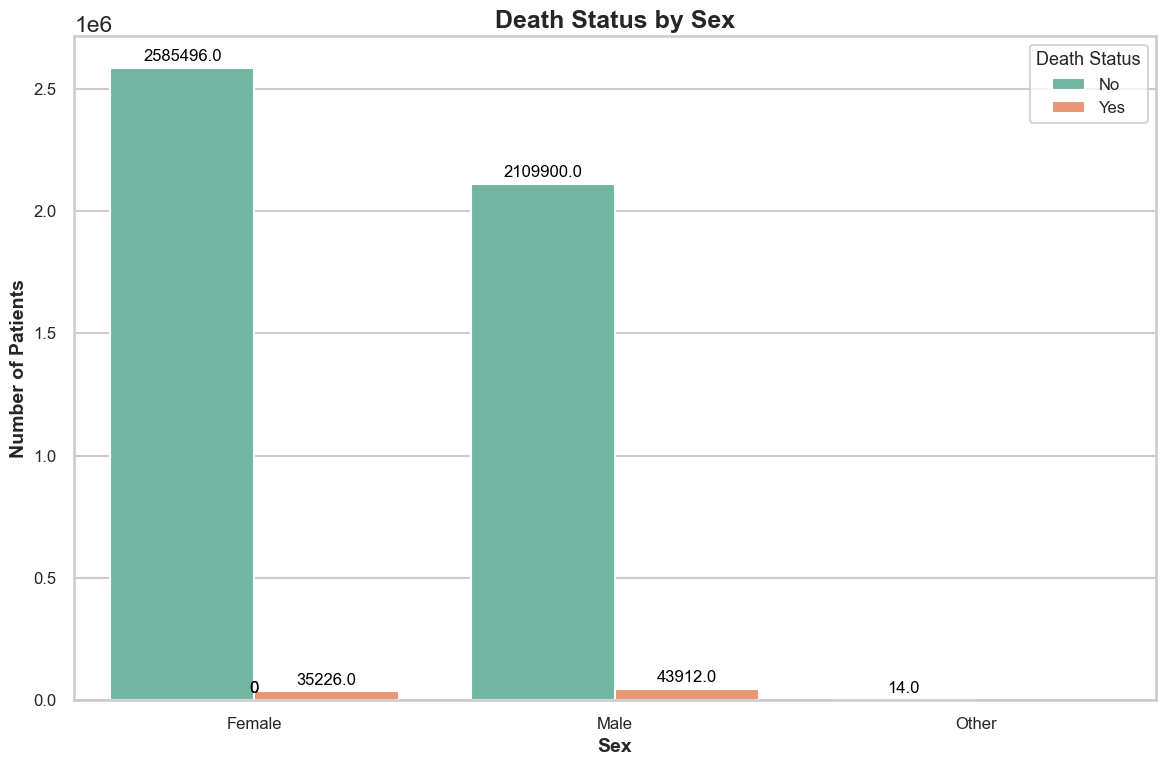

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a nice style and context
sns.set(style="whitegrid", context="talk")

plt.figure(figsize=(12, 8))

# Create the countplot
ax = sns.countplot(data=df, x='sex', hue='death_yn', palette="Set2")

# Add numbers to each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5), 
                textcoords='offset points')

# Customize labels and title
plt.title('Death Status by Sex', fontsize=18, weight='bold')
plt.xlabel('Sex', fontsize=14, weight='bold')
plt.ylabel('Number of Patients', fontsize=14, weight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Customize the legend
plt.legend(title='Death Status', title_fontsize='13', fontsize='12', loc='upper right')

# Show the plot
plt.tight_layout()
plt.show()


### Contingency Table

In [ ]:
# Create a contingency table
contingency_table3_2 = pd.crosstab(df['sex'], df['death_yn'])

print(contingency_table3_2)


death_yn       No    Yes
sex                     
Female    2585496  35226
Male      2109900  43912
Other          14      0


### Chi-Sqare Test Result

In [ ]:

# Perform the Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency_table3_2)

if p < 0.005:
    print(f"\nChi2: {chi2}")
    print(f"p-value: {p}")
    print(f"Degrees of freedom: {dof}")
    print("\nExpected frequencies:")
    print(expected)
    print("\nThe p-value is less than 0.005. There is significant association found between sex and death from COVID-19.")

else:
    print("\nThe p-value is greater than or equal to 0.005. No significant association was found.")


Chi2: 3500.18092650455
p-value: 0.0
Degrees of freedom: 2

Expected frequencies:
[[2.57728361e+06 4.34383941e+04]
 [2.11811263e+06 3.56993739e+04]
 [1.37679504e+01 2.32049610e-01]]

The p-value is less than 0.005. There is significant association found between sex and death from COVID-19.


## 3- Race and Death Rate
### Hypothesis statments:
#### Ho: there is no association between race and death rate for COVID-19 patients
#### Ha: there is an association between race and death rate for COVID-19 patients



### Data Plotting

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a nice style and context
sns.set(style="whitegrid", context="talk")

plt.figure(figsize=(16, 8))  # Adjusted figure size for better readability

# Create the countplot
ax = sns.countplot(data=df, x='race', hue='death_yn', palette='coolwarm')

# Add numbers to each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5), 
                textcoords='offset points')

# Customize labels and title
plt.title('Death Status by Race', fontsize=18, weight='bold')
plt.xlabel('Race', fontsize=14, weight='bold')
plt.ylabel('Number of Patients', fontsize=14, weight='bold')
plt.xticks(fontsize=12, rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.yticks(fontsize=12)

# Customize the legend
plt.legend(title='Death Status', title_fontsize='13', fontsize='12', loc='upper right')

# Show the plot
plt.tight_layout()
plt.show()


### Contingency Table

In [ ]:
# Create a contingency table
contingency_table3_3 = pd.crosstab(df['race'], df['death_yn'])

print(contingency_table3_3)

death_yn                                     No    Yes
race                                                  
American Indian/Alaska Native             17912    118
Asian                                    113337   2386
Black                                    605111   8583
Multiple/Other                            50185    108
Native Hawaiian/Other Pacific Islander      915      0
White                                   3260997  64289


### Chi-Sqare Test Result

In [ ]:

# Perform the Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency_table3_3)

if p < 0.005:
    print(f"\nChi2: {chi2}")
    print(f"p-value: {p}")
    print(f"Degrees of freedom: {dof}")
    print("\nExpected frequencies:")
    print(expected)
    print("\nThe p-value is less than 0.005. There is significant association found between race and death from COVID-19.")

else:
    print("\nThe p-value is greater than or equal to 0.005. No significant association was found.")


Chi2: 1753.859070376362
p-value: 0.0
Degrees of freedom: 5

Expected frequencies:
[[1.76999816e+04 3.30018427e+02]
 [1.13604823e+05 2.11817650e+03]
 [6.02461037e+05 1.12329633e+04]
 [4.93724444e+04 9.20555559e+02]
 [8.98251977e+02 1.67480233e+01]
 [3.26442046e+06 6.08655382e+04]]

The p-value is less than 0.005. There is significant association found between race and death from COVID-19.


# Part 2

# My claim:
## There is an association between patients having asymptomatic or symptomatic symptoms and the probablity of death from COVID-19.


## Hypotheses Statement:
#### Ho: the death proportion is the same for patients with symptomatic and asymptomatic symptom status.
#### Ha: the death proportion is not the same for patients with symptomatic and asymptomatic symptom status


### Data Collection

In [ ]:
df2 = pd.read_csv("../Datasets/DS-2/data.csv", 
                usecols=["symptom_status", "death_yn"],
                 dtype={"symptom_status": "category", "death_yn":"category"})
print(df2.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19020962 entries, 0 to 19020961
Data columns (total 2 columns):
 #   Column          Dtype   
---  ------          -----   
 0   symptom_status  category
 1   death_yn        category
dtypes: category(2)
memory usage: 36.3 MB
None


### Data Cleaning

In [ ]:
df2 = df2[(df2["symptom_status"] != "Missing") & (df2["symptom_status"] != "Unknown")]
df2 = df2[(df2["death_yn"] != "Missing") & (df2["death_yn"] != "Unknown")]

df2["symptom_status"] = df2["symptom_status"].cat.remove_unused_categories()
df2["death_yn"] = df2["death_yn"].cat.remove_unused_categories()

df2.reset_index(drop=True, inplace=True)

display(df2.head())
display(df2.info())

symptom_status death_yn
0    Symptomatic       No
1    Symptomatic       No
2    Symptomatic       No
3    Symptomatic       No
4    Symptomatic       No

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3083440 entries, 0 to 3083439
Data columns (total 2 columns):
 #   Column          Dtype   
---  ------          -----   
 0   symptom_status  category
 1   death_yn        category
dtypes: category(2)
memory usage: 5.9 MB


None

### Data Plotting

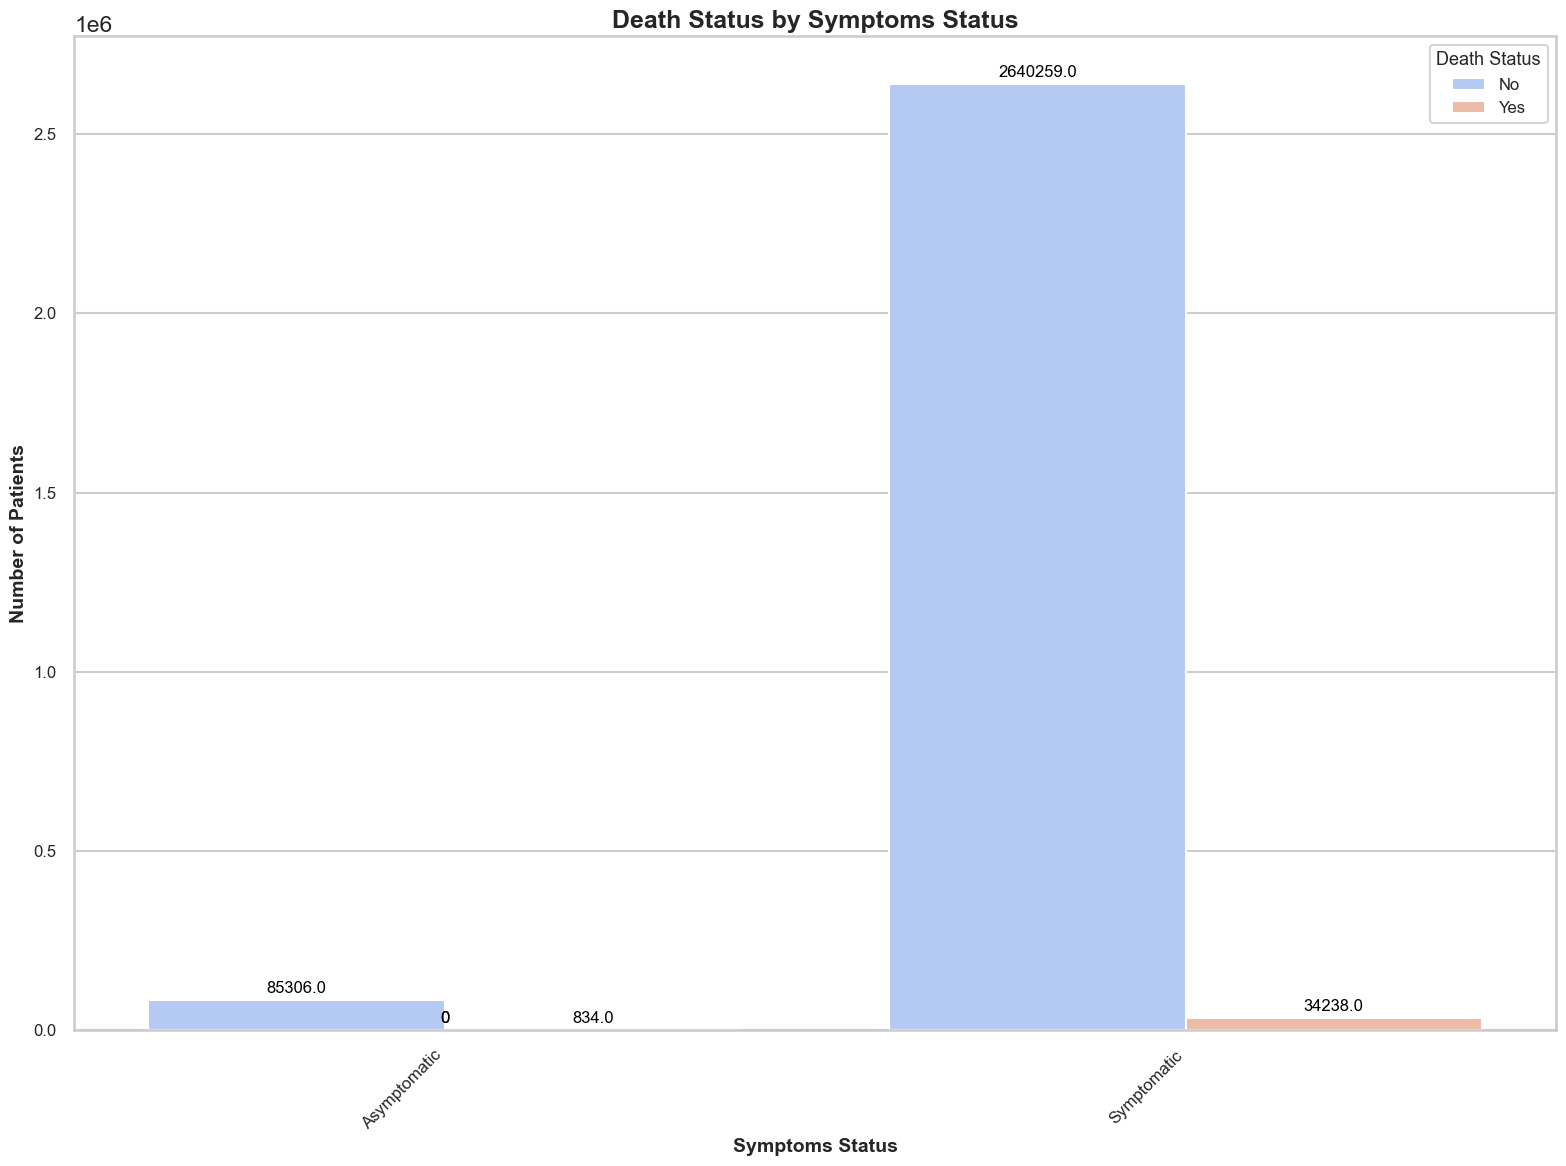

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a nice style and context
sns.set(style="whitegrid", context="talk")

plt.figure(figsize=(16, 12))

# Create the countplot
ax = sns.countplot(data=df2, x='symptom_status', hue='death_yn', palette='coolwarm')

# Add numbers to each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5), 
                textcoords='offset points')

# Customize labels and title
plt.title('Death Status by Symptoms Status', fontsize=18, weight='bold')
plt.xlabel('Symptoms Status', fontsize=14, weight='bold')
plt.ylabel('Number of Patients', fontsize=14, weight='bold')
plt.xticks(fontsize=12, rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.yticks(fontsize=12)

# Customize the legend
plt.legend(title='Death Status', title_fontsize='13', fontsize='12', loc='upper right')

# Show the plot
plt.tight_layout()
plt.show()


### Z-Test for two population porportion


In [ ]:
import numpy as np
from statsmodels.stats.proportion import proportions_ztest

# Summarize the data
summary = df2.groupby(["symptom_status", "death_yn"]).size().unstack(fill_value=0)

# Print the summary
print(summary)

# Extract counts for the z-test
asymptomatic_counts = summary.loc["Asymptomatic"].values
symptomatic_counts = summary.loc["Symptomatic"].values

# Number of death cases (Yes) for each symptom status
deaths = np.array([asymptomatic_counts[1], symptomatic_counts[1]])

# Total number of cases for each symptom status
totals = np.array([asymptomatic_counts.sum(), symptomatic_counts.sum()])

# Perform the two-proportion z-test
z_stat, p_value = proportions_ztest(deaths, totals)

# Print the results
print(f"Z-statistic: {z_stat}")
print(f"P-value: {p_value}")
# Conclusion based on p-value
if p_value < 0.05:
    print("There is a significant difference in the proportions of death between asymptomatic and symptomatic patients.")
else:
    print("There is no significant difference in the proportions of death between asymptomatic and symptomatic patients.")


C:\Users\user\AppData\Local\Temp\ipykernel_20280\2777973928.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary = df2.groupby(["symptom_status", "death_yn"]).size().unstack(fill_value=0)


death_yn             No    Yes
symptom_status                
Asymptomatic      85306    834
Symptomatic     2640259  34238
Z-statistic: -8.047090626655558
P-value: 8.478539931811714e-16
There is a significant difference in the proportions of death between asymptomatic and symptomatic patients.


## Question 4

Use the COVID Case Surveillance dataset to fit a regression model that predicts the total percent (or proportion) of deaths out of all COVID cases in a given month based on :
- Gender distribution of all cases over the month (Proportion or % of females and
males).
- Age distribution of all cases over the month (Proportion or % of each age group).
- Proportion (or %) of all cases over the month that end up in the ICU.
- Proportion (or %) of all cases over the month that end up hospitalized.

In [ ]:
import pandas as pd

In this next cell I import the data and only the columns I am interested in, then I filter all the missing values and the unknown values and calculate the means of the values i need

In [ ]:
relevant_columns = [
    'case_month', 'age_group', 'sex', 'hosp_yn', 'icu_yn', 'death_yn'
]


df = pd.read_csv('data.csv', usecols=relevant_columns)


covid_data_filtered = df.dropna(subset=['age_group', 'sex', 'hosp_yn', 'icu_yn', 'death_yn'])

covid_data_filtered = covid_data_filtered[
    (covid_data_filtered['hosp_yn'] != 'Missing') & (covid_data_filtered['hosp_yn'] != 'Unknown') &
    (covid_data_filtered['icu_yn'] != 'Missing') & (covid_data_filtered['icu_yn'] != 'Unknown') &
    (covid_data_filtered['death_yn'] != 'Missing') & (covid_data_filtered['death_yn'] != 'Unknown')
]


covid_data_grouped = covid_data_filtered.groupby('case_month').apply(
    lambda x: pd.Series({
        'female_proportion': (x['sex'] == 'Female').mean(),
        'age_0_17_proportion': (x['age_group'] == '0 - 17 years').mean(),
        'age_18_49_proportion': (x['age_group'] == '18 to 49 years').mean(),
        'age_50_64_proportion': (x['age_group'] == '50 to 64 years').mean(),
        'age_65_proportion': (x['age_group'] == '65+ years').mean(),
        'icu_proportion': (x['icu_yn'] == 'Yes').mean(),
        'hospitalized_proportion': (x['hosp_yn'] == 'Yes').mean(),
        'death_proportion': (x['death_yn'] == 'Yes').mean()
    })
).reset_index()

/tmp/ipykernel_30118/1127614148.py:18: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  covid_data_grouped = covid_data_filtered.groupby('case_month').apply(


Save it to be available to use quickly after that

In [ ]:
covid_data_grouped.to_csv("Grouped_Data.csv")

In [ ]:
import pandas as pd

grouped_df = pd.read_csv('Grouped_Data.csv')

In [ ]:
import pandas as pd
import statsmodels.api as sm

file_path = 'Grouped_Data.csv'
data = pd.read_csv(file_path)

X = data[['female_proportion', 'age_0_17_proportion', 'age_18_49_proportion', 
          'age_50_64_proportion', 'age_65_proportion', 'icu_proportion', 'hospitalized_proportion']]
y = data['death_proportion']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       death_proportion   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.648
Method:                 Least Squares   F-statistic:                     15.74
Date:                Wed, 22 May 2024   Prob (F-statistic):           2.27e-09
Time:                        13:39:26   Log-Likelihood:                 134.34
No. Observations:                  49   AIC:                            -254.7
Df Residuals:                      42   BIC:                            -241.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

# * Intercept (const):
    * Coefficient: 0.2141
    * p-value: 0.002
# * female_proportion:
    * Coefficient: -0.3489
    * p-value: 0.015
# * age_0_17_proportion:
    * Coefficient: -0.0413
    * p-value: 0.184
# * age_18_49_proportion:
    * Coefficient: -0.1005
    * p-value: 0.035
# * age_50_64_proportion:
    * Coefficient: 0.4010
    * p-value: 0.000
# * age_65_proportion:
    * Coefficient: -0.0451
    * p-value: 0.420
# * icu_proportion:
    * Coefficient: 0.5399
    * p-value: 0.008
# * hospitalized_proportion:
    * Coefficient: -0.1719
    * p-value: 0.071

## Good Predictors:

1. female_proportion (p-value = 0.015)
2. age_18_49_proportion (p-value = 0.035)
3. age_50_64_proportion (p-value = 0.000)
4. icu_proportion (p-value = 0.008)
## Bad Predictors:

1. age_0_17_proportion (p-value = 0.184)
2. age_65_proportion (p-value = 0.420)
3. hospitalized_proportion (p-value = 0.071)

The model has R-squared value of 0.692, that means it is closer to 1 and it somehow explains the variability in the response variable Y

Let's calculate the Variance Inflation Factor (VIF) for each predictor to assess multicollinearity and lets plot each variable against the other variable.

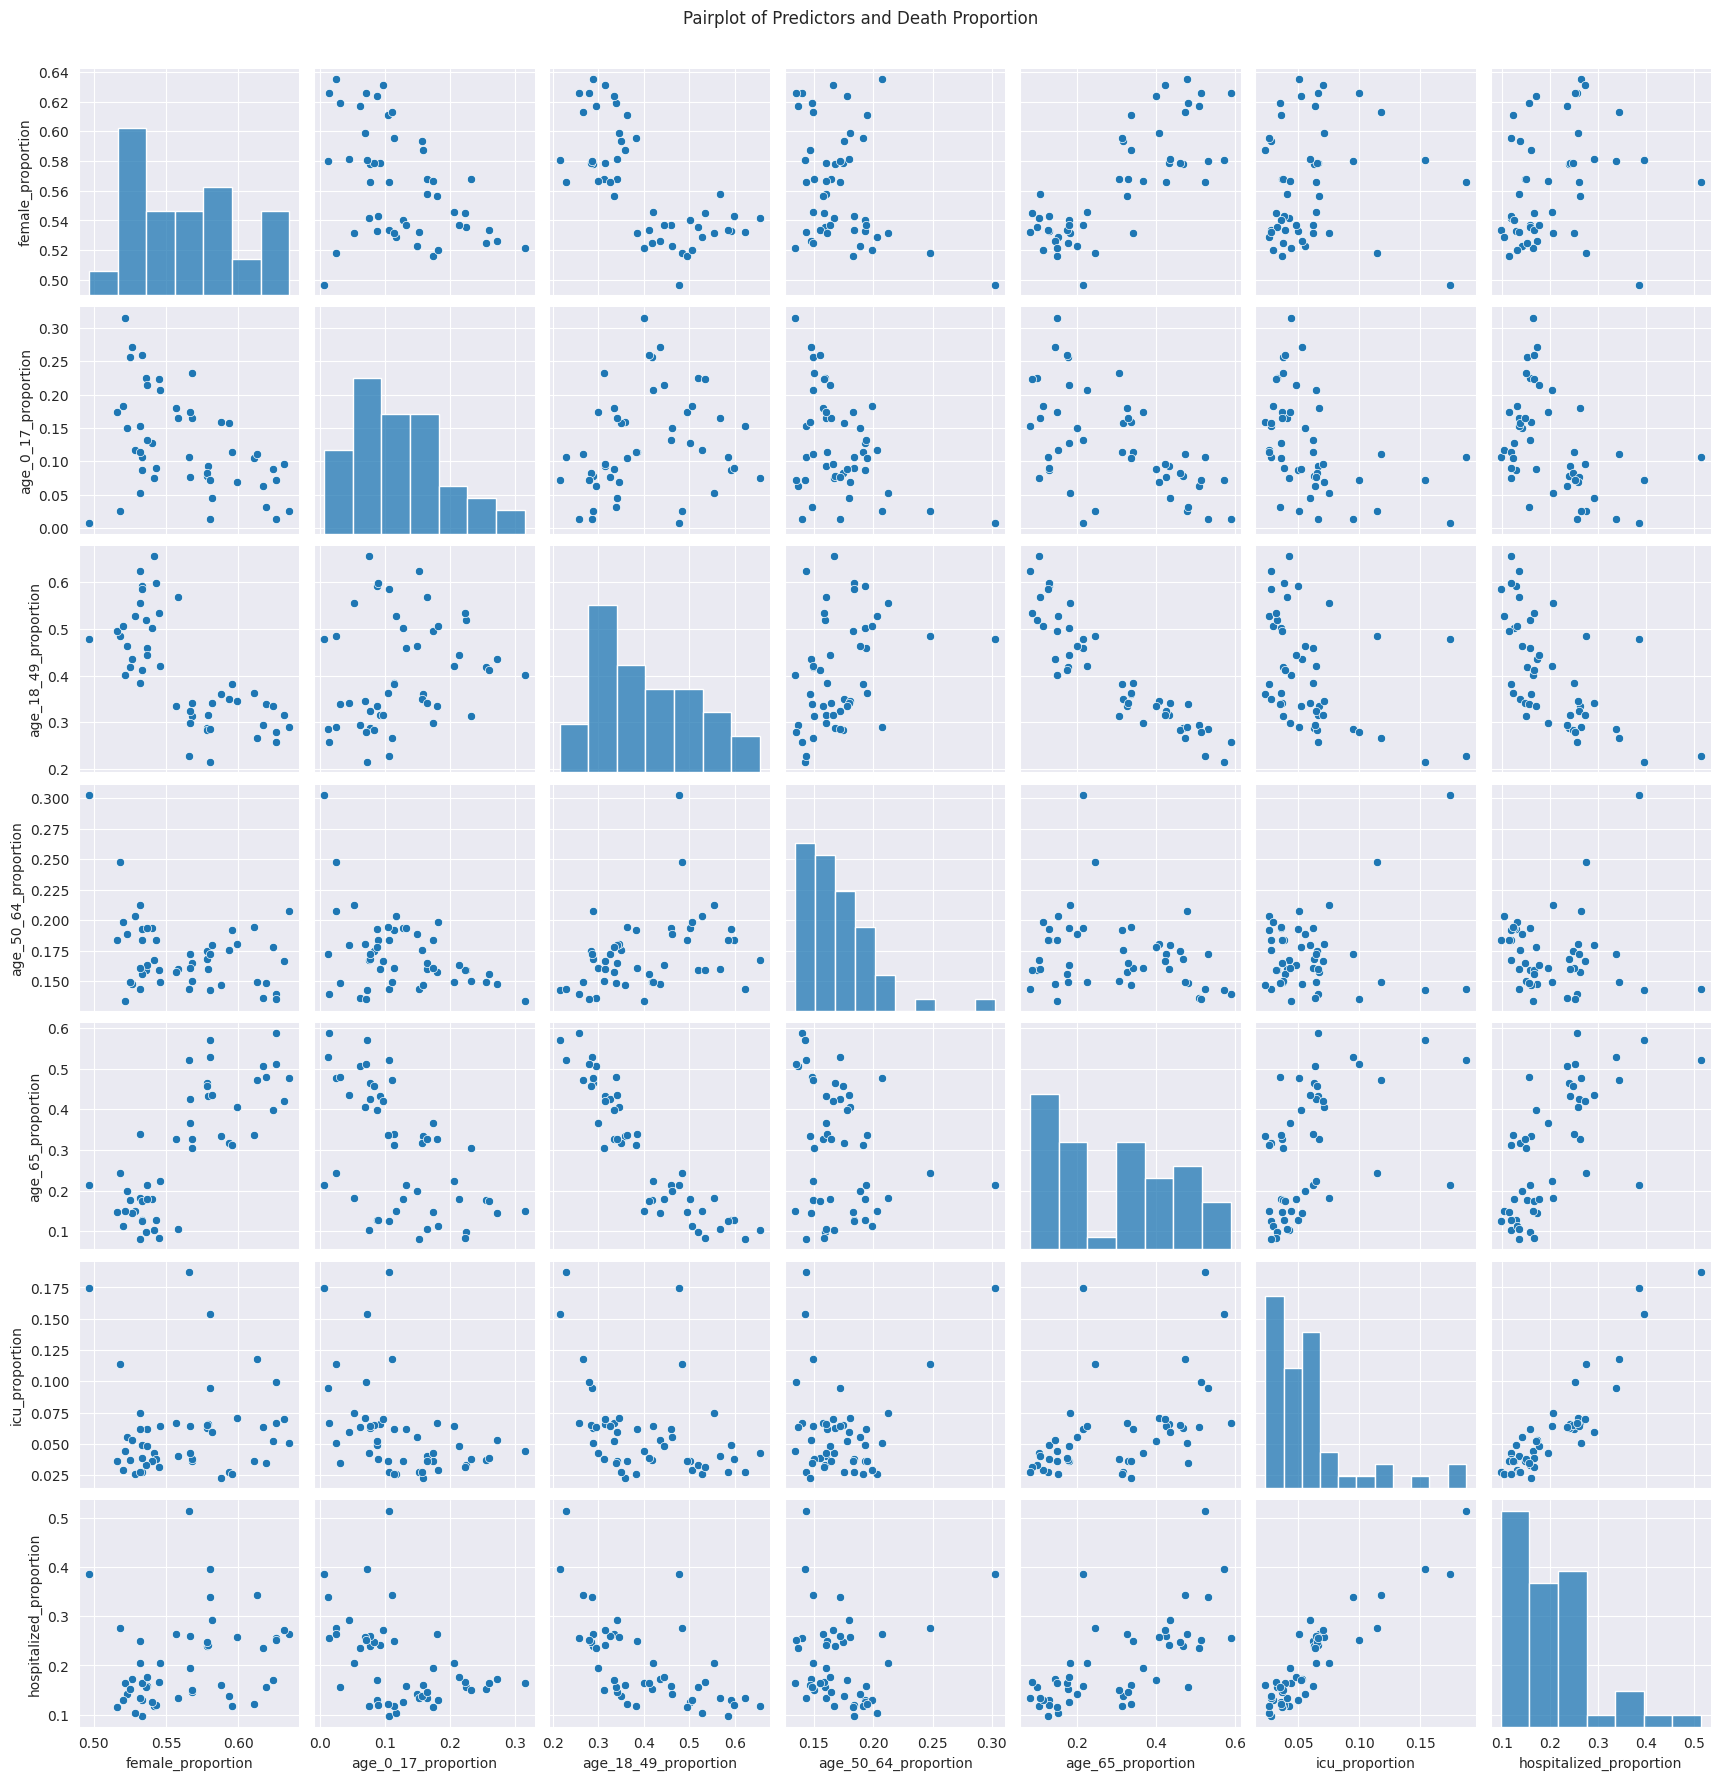

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a pairplot of the final predictors to visualize relationships
pairplot_data = data[['female_proportion', 'age_0_17_proportion', 'age_18_49_proportion', 
          'age_50_64_proportion', 'age_65_proportion', 'icu_proportion', 'hospitalized_proportion']]

# Create pairplot
sns.pairplot(pairplot_data)
plt.suptitle('Pairplot of Predictors and Death Proportion', y=1.02)
plt.show()


From the graph is is not really apparent what is correlated(the only apparent ones are ICU propotions and hospitalized propotions, and age portion 65 with age 18-49), lets try heatmap

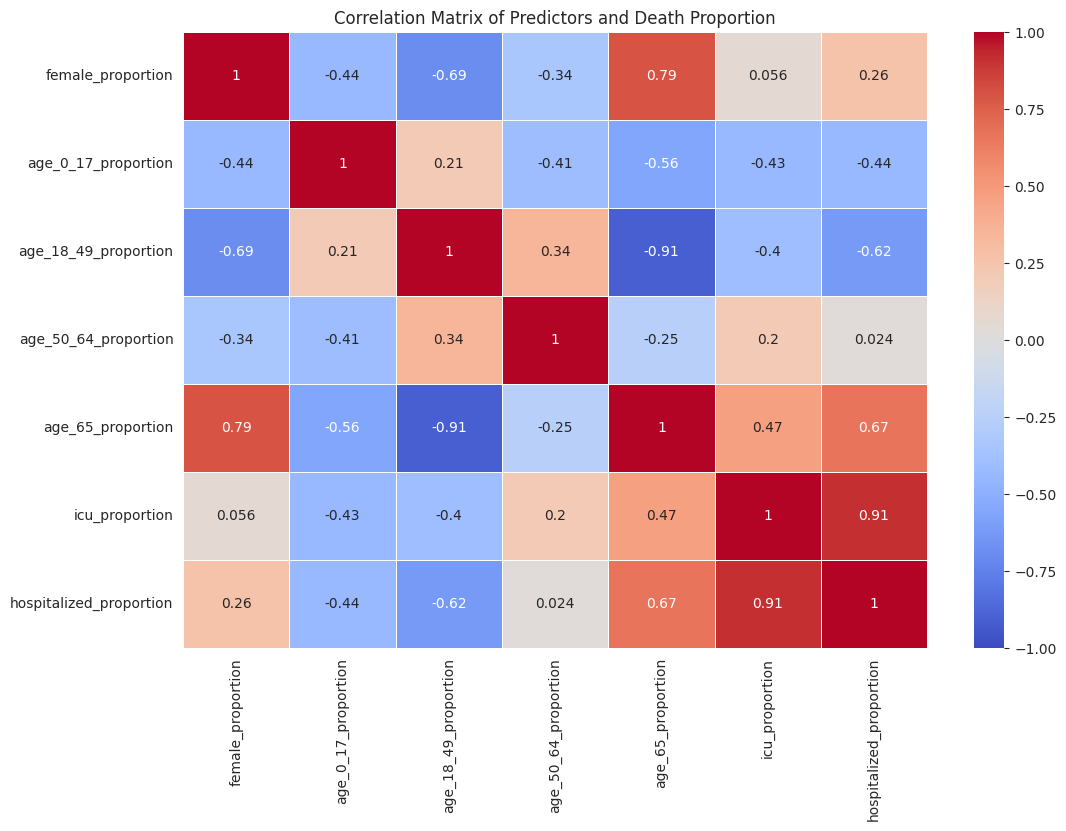

In [ ]:
# Calculate the correlation matrix
correlation_matrix = pairplot_data.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Correlation Matrix of Predictors and Death Proportion')
plt.show()


ICU propotion is highly correlated with hospitalized propotion, age 65 propotion is highly negatively correlated with age 18-45 propotion

Lets check VIT factor

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each predictor
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif_data


/home/ahmed/.local/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/home/ahmed/.local/lib/python3.10/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Variable        VIF
0                    const   0.000000
1        female_proportion   4.416857
2      age_0_17_proportion        inf
3     age_18_49_proportion        inf
4     age_50_64_proportion        inf
5        age_65_proportion        inf
6           icu_proportion   8.472324
7  hospitalized_proportion  11.104651

age_0_17_proportion, age_18_49_proportion, age_50_64_proportion, age_65_proportion all have infinite VIFs, suggesting perfect collinearity. Which is obvious as all these variables are dependent on each other, their sum must add up to 1

Lets try removing the intercept

In [ ]:
model_no_intercept = sm.OLS(y, X.drop(columns='const')).fit()
print(model_no_intercept.summary())


                            OLS Regression Results                            
Dep. Variable:       death_proportion   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.648
Method:                 Least Squares   F-statistic:                     15.74
Date:                Wed, 22 May 2024   Prob (F-statistic):           2.27e-09
Time:                        18:07:25   Log-Likelihood:                 134.34
No. Observations:                  49   AIC:                            -254.7
Df Residuals:                      42   BIC:                            -241.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
female_proportion         

Removing the intercept did not change anything in the R squared Metric

In [ ]:
X_with_higher_order = X.copy()
for col in X_with_higher_order.columns:
    if col != 'const':
        X_with_higher_order[f'{col}^2'] = X_with_higher_order[col] ** 2

model_higher_order = sm.OLS(y, X_with_higher_order).fit()
print(model_higher_order.summary())


                            OLS Regression Results                            
Dep. Variable:       death_proportion   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     20.04
Date:                Wed, 22 May 2024   Prob (F-statistic):           1.90e-12
Time:                        18:08:03   Log-Likelihood:                 157.74
No. Observations:                  49   AIC:                            -287.5
Df Residuals:                      35   BIC:                            -261.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

The R-Squared Value is increased here to be 0.882 and the F-Statistic is 20.04 and it is a high F statistic

High F-statistic: Indicates that at least one of the predictor variables is significantly related to the dependent variable.